# VERY WORK IN PROGRESS

In [1]:
#Import of Basic Libraries
#Basic Libraries
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import io
sb.set()

In [4]:
movieDB = pd.read_csv('DataCleaning30Y/allCleanedMovieData30Y.csv')
movieDB = pd.DataFrame(movieDB[['id','original_title','budget','revenue','popularity.1','vote_average','runtime','top_casts_popularity_avg','casts_popularity_sum','top_cast_popularity','top_crews_popularity_avg','crews_popularity_sum','top_crew_popularity','percentage_revenue','Won']])
movieDB

id                            original_title      budget  \
0           5                                Four Rooms   4000000.0   
1           6                            Judgment Night  21000000.0   
2          12                              Finding Nemo  94000000.0   
3          13                              Forrest Gump  55000000.0   
4          14                           American Beauty  15000000.0   
...       ...                                       ...         ...   
7789  1011679                    Shark Side of the Moon     10000.0   
7790  1012290  South Park: The 25th Anniversary Concert     70000.0   
7791  1020696                                 Play Dead         NaN   
7792  1026563                             13 exorcismos         NaN   
7793  1028463                                     Nacho      1100.0   

          revenue  popularity.1  vote_average  runtime  \
0       4257354.0        22.784         5.744     98.0   
1      12136938.0        11.530         6.543    109.0   
2     940335536.0        99.340         7.824    100.0   
3     677387716.0        68.192         8.481    142.0   
4     356296601.0        29.015         8.030    122.0   
...           ...           ...           ...      ...   
7789          NaN       800.669         5.304     88.0   
7790          NaN        17.196         7.800     99.0   
7791     356840.0        12.814         6.000    106.0   
7792    1891519.0       612.385         5.549    100.0   
7793          NaN         7.868         2.000    103.0   

      top_casts_popularity_avg  casts_popularity_sum  top_cast_popularity  \
0                    32.033857               362.055               36.681   
1                    14.834857               124.008               23.049   
2                    23.006429               467.094               41.251   
3                    32.837571               526.057               99.618   
4                    19.362857               229.872               25.965   
...                        ...                   ...                  ...   
7789                  2.827286                25.501                6.801   
7790                  3.210571                32.674               10.757   
7791                  7.692429                54.687               25.594   
7792                  3.465857                26.684                7.231   
7793                  0.600000                 1.800                0.600   

      top_crews_popularity_avg  crews_popularity_sum  top_crew_popularity  \
0                    15.715714               225.920               27.939   
1                     3.600143                32.165                5.436   
2                     8.758000               404.117               14.186   
3                     6.422000               224.432               11.735   
4                     9.646571               208.761               28.986   
...                        ...                   ...                  ...   
7789                  2.077286                47.743                2.514   
7790                  1.109500                 4.438                1.734   
7791                  3.105667                 9.317                5.896   
7792                  0.851714                 7.762                1.428   
7793                  0.600000                 1.200                0.600   

      percentage_revenue    Won  
0                 106.43  False  
1                  57.79  False  
2                1000.36   True  
3                1231.61   True  
4                2375.31   True  
...                  ...    ...  
7789              187.66  False  
7790              187.66  False  
7791              187.66  False  
7792              187.66  False  
7793              187.66  False  

[7794 rows x 15 columns]

## Explore the dataset
We want to explore the data set to see what kind of variables has a large correlation to whether they have won the best picture's oscar or not

In [18]:
print(movieDB.dtypes) #idk why the Unnamed keeps coming back wdh

Unnamed: 0                    int64
id                            int64
original_title               object
budget                      float64
revenue                     float64
release_date                float64
popularity.1                float64
vote_average                float64
runtime                     float64
top_casts_popularity_avg    float64
casts_popularity_sum        float64
top_cast_popularity         float64
top_crews_popularity_avg    float64
crews_popularity_sum        float64
top_crew_popularity         float64
percentage_revenue          float64
Won                            bool
dtype: object


<AxesSubplot:>

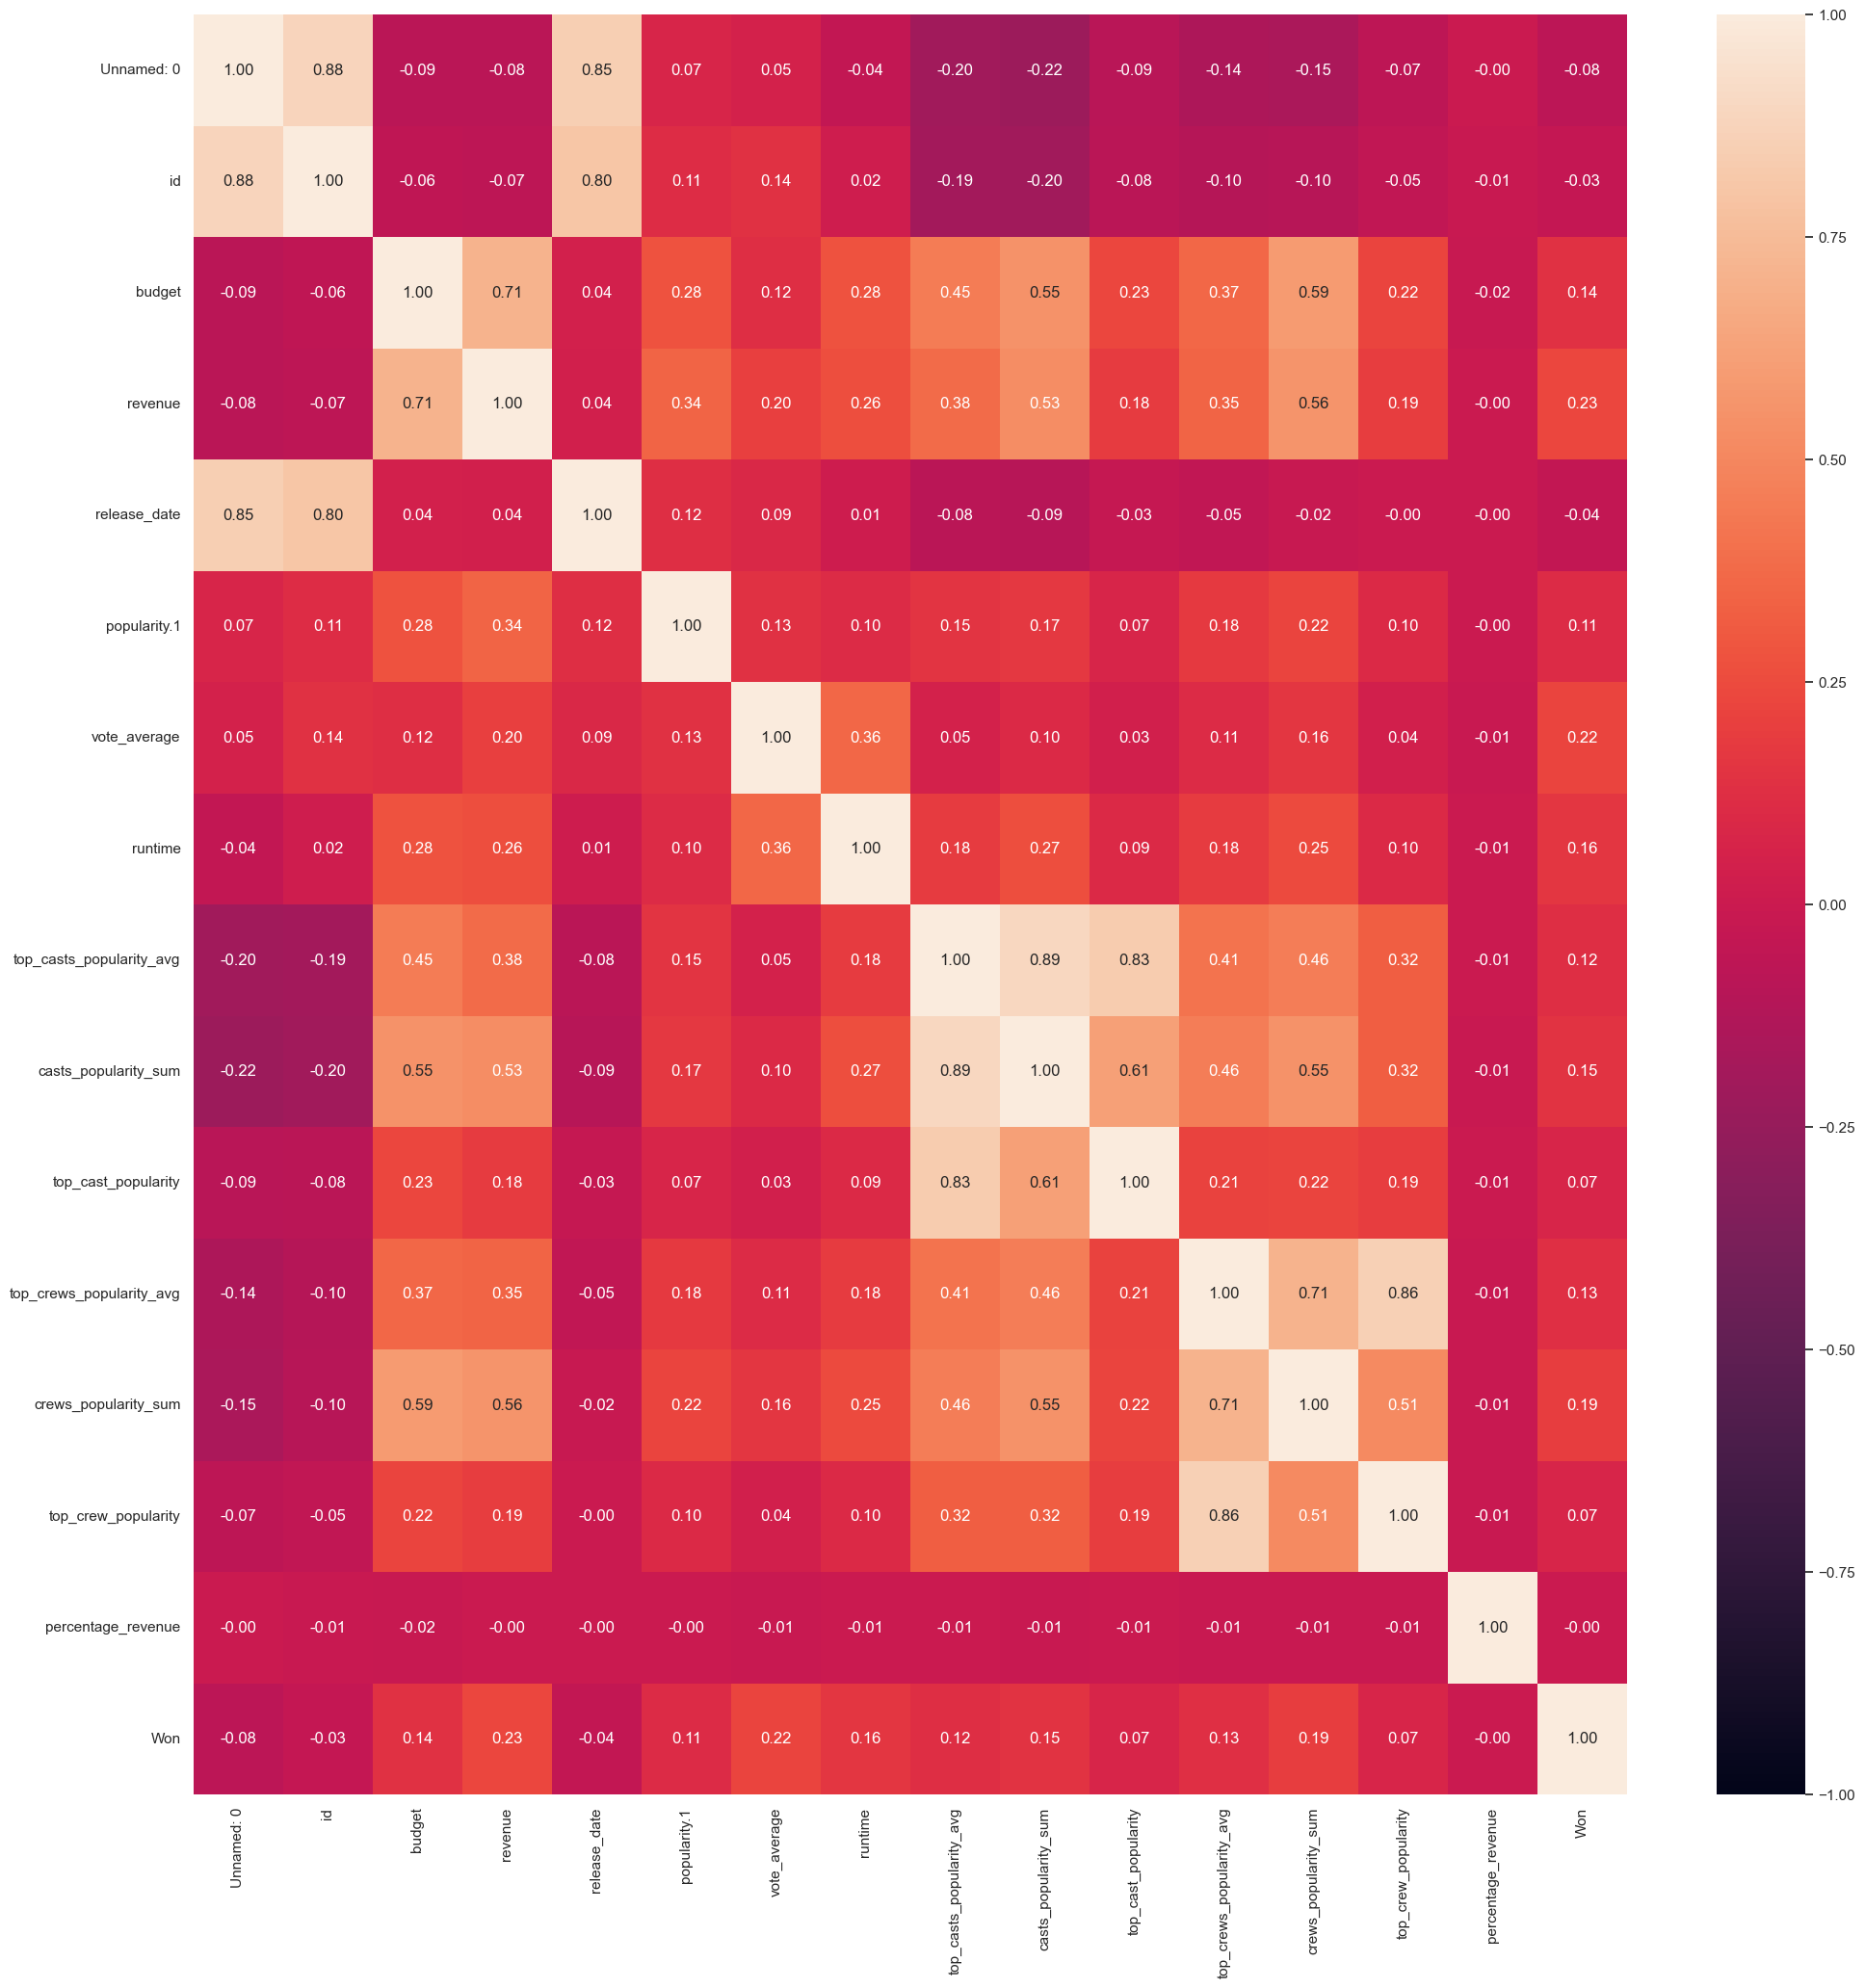

In [19]:
movieDB.drop("Unnamed: 0", axis=1)
f = plt.figure(figsize=(24,24))
sb.heatmap(movieDB.corr(), vmin=-1, vmax = 1, annot = True, fmt=".2f")

### Testing for whether there's a link between vote_average

In [20]:
# Importing essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Creating all the separate DataFrames

In [21]:
won = pd.DataFrame(movieDB['Won'])
runtime = pd.DataFrame(movieDB['runtime'])
castSum = pd.DataFrame(movieDB['casts_popularity_sum'])
crewSum = pd.DataFrame(movieDB['crews_popularity_sum'])
voteAvg = pd.DataFrame(movieDB['vote_average'])
percRev = pd.DataFrame(movieDB['percentage_revenue'])


# Creating the Test and Train Sets for decision tree generation later

In [22]:
# Splitting the dataset into the Training set and Test set
# 80% of the data will be used for training and 20% for test based on runtime
won_train, won_test, runtime_train, runtime_test = train_test_split(won, runtime, test_size = 0.2, random_state=50)
print("Runtime Set")
print("Train Set :", won_train.shape, runtime_train.shape)
print("Test Set  :", won_test.shape, runtime_test.shape)

# Based on castSum
won_train2, won_test2, castSum_train, castSum_test = train_test_split(won, castSum, test_size = 0.2, random_state=50)
print("Cast Set")
print("Train Set :", won_train2.shape, castSum_train.shape)
print("Test Set  :", won_test2.shape, castSum_test.shape)

# Based on crewSum
won_train3, won_test3, crewSum_train, crewSum_test = train_test_split(won, crewSum, test_size = 0.2, random_state=50)
print("Crew Set")
print("Train Set :", won_train3.shape, crewSum_train.shape)
print("Test Set  :", won_test3.shape, crewSum_test.shape)

# Based on voteAvg
won_train4, won_test4, voteAvg_train, voteAvg_test = train_test_split(won, voteAvg, test_size = 0.2, random_state=50)
print("Vote Avg Set")
print("Train Set :", won_train4.shape, voteAvg_train.shape)
print("Test Set  :", won_test4.shape, voteAvg_test.shape)

# Based on percRev (is using 6 as 5 used for multiVar and this was later added)
won_train6, won_test6, percRev_train, percRev_test = train_test_split(won, percRev, test_size = 0.2, random_state=50)
print("Percentage Revenue Set")
print("Train Set :", won_train6.shape, percRev_train.shape)
print("Test Set  :", won_test6.shape, percRev_test.shape)

Runtime Set
Train Set : (6235, 1) (6235, 1)
Test Set  : (1559, 1) (1559, 1)
Cast Set
Train Set : (6235, 1) (6235, 1)
Test Set  : (1559, 1) (1559, 1)
Crew Set
Train Set : (6235, 1) (6235, 1)
Test Set  : (1559, 1) (1559, 1)
Vote Avg Set
Train Set : (6235, 1) (6235, 1)
Test Set  : (1559, 1) (1559, 1)
Percentage Revenue Set
Train Set : (6235, 1) (6235, 1)
Test Set  : (1559, 1) (1559, 1)


## Runtime 

<AxesSubplot:>

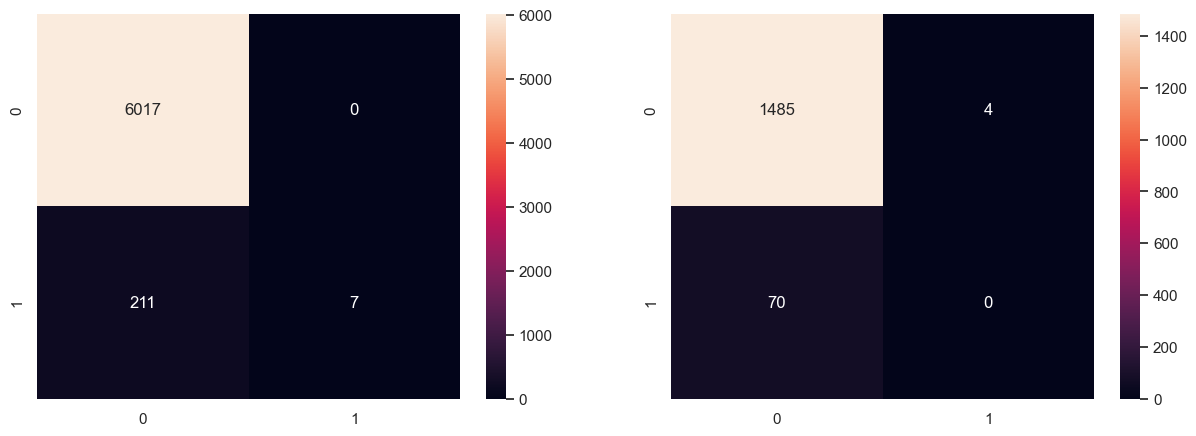

In [23]:
# Decision Tree
dectree = DecisionTreeClassifier(max_depth = 20)
dectree.fit(runtime_train, won_train)

# Predicting the Test set results
runtime_train_pred = dectree.predict(runtime_train)
runtime_test_pred = dectree.predict(runtime_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train, runtime_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test, runtime_test_pred), annot = True, fmt = "d", ax = ax[1])

[Text(0.4772135416666667, 0.96875, 'runtime <= 125.5\ngini = 0.067\nsamples = 6235\nvalue = [6017, 218]\nclass = Won'),
 Text(0.23828125, 0.90625, 'runtime <= 106.5\ngini = 0.046\nsamples = 5329\nvalue = [5204, 125]\nclass = Won'),
 Text(0.13151041666666666, 0.84375, 'runtime <= 97.5\ngini = 0.027\nsamples = 3589\nvalue = [3539, 50]\nclass = Won'),
 Text(0.0546875, 0.78125, 'runtime <= 28.0\ngini = 0.018\nsamples = 2201\nvalue = [2181, 20]\nclass = Won'),
 Text(0.020833333333333332, 0.71875, 'runtime <= 24.0\ngini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = Won'),
 Text(0.010416666666666666, 0.65625, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = Won'),
 Text(0.03125, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Not Won'),
 Text(0.08854166666666667, 0.71875, 'runtime <= 87.5\ngini = 0.017\nsamples = 2191\nvalue = [2172, 19]\nclass = Won'),
 Text(0.052083333333333336, 0.65625, 'runtime <= 84.5\ngini = 0.003\nsamples = 607\nvalue = [606, 1]\nclass = Won'),
 Text(0.0416

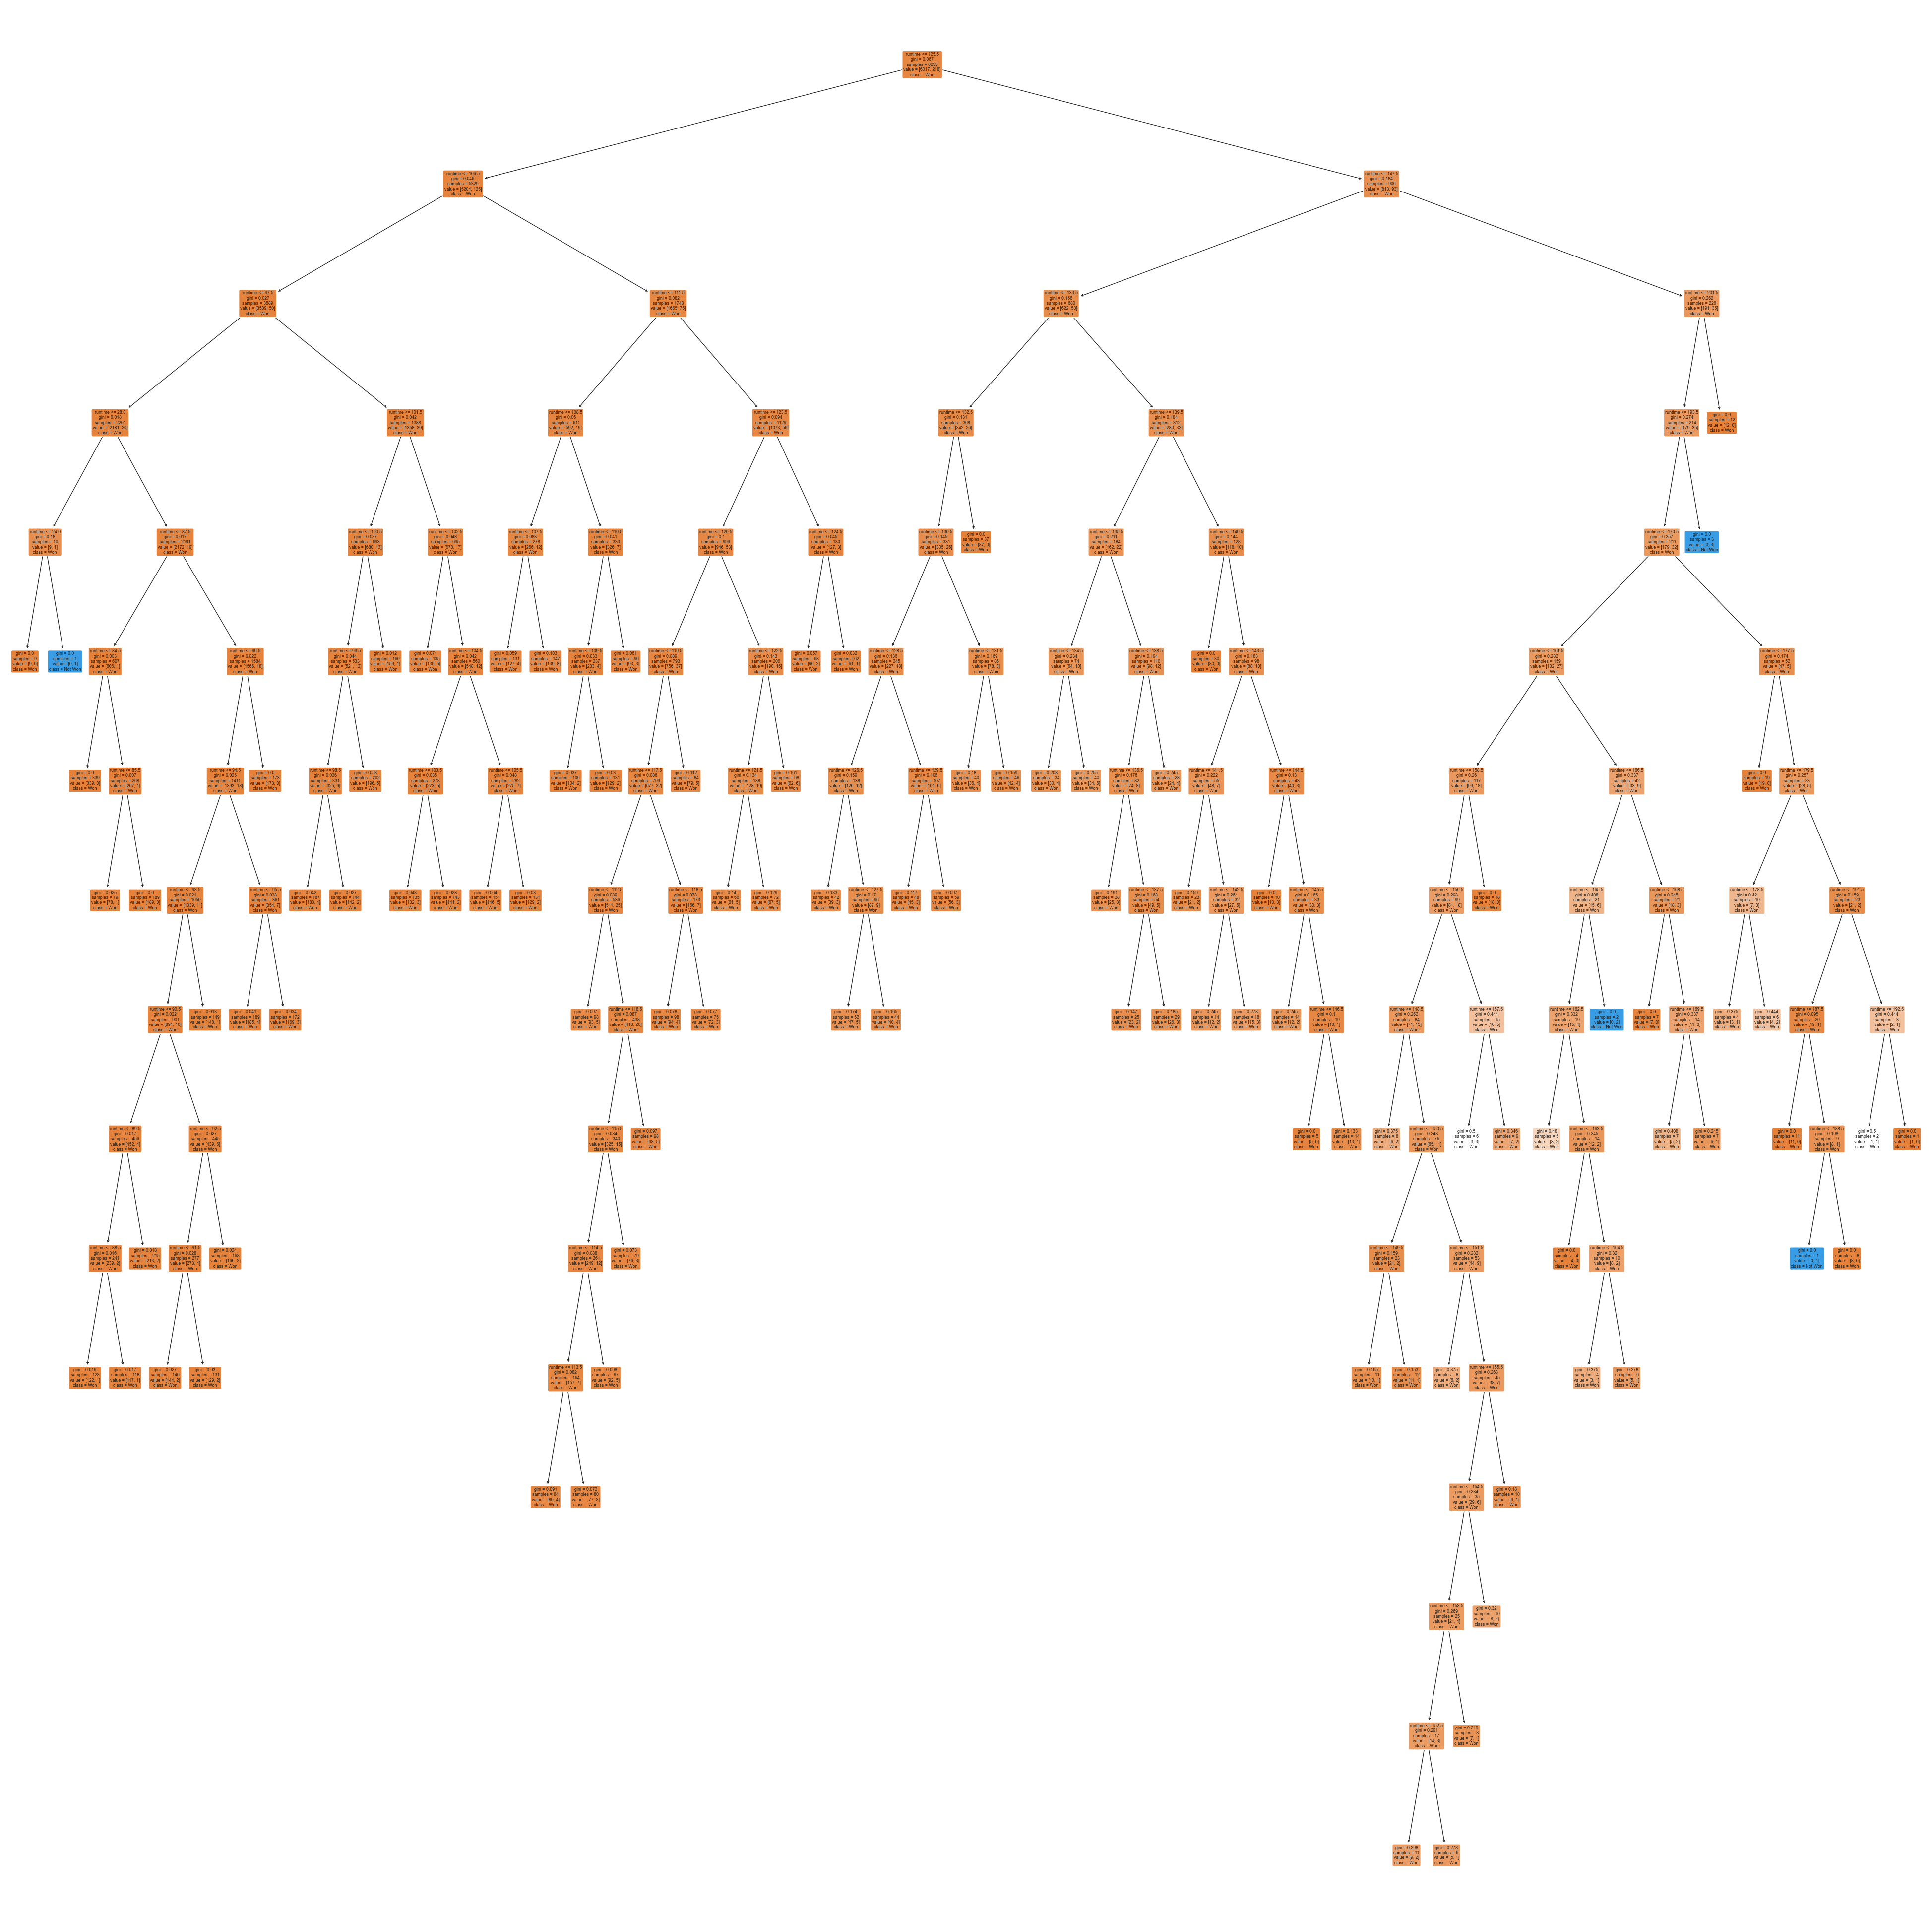

In [9]:
# Printing decision Tree
f = plt.figure(figsize=(50,50))
plot_tree(dectree, filled = True, rounded = True, class_names = ["Won", "Not Won"], feature_names = ["runtime"])

## CastSum

<AxesSubplot:>

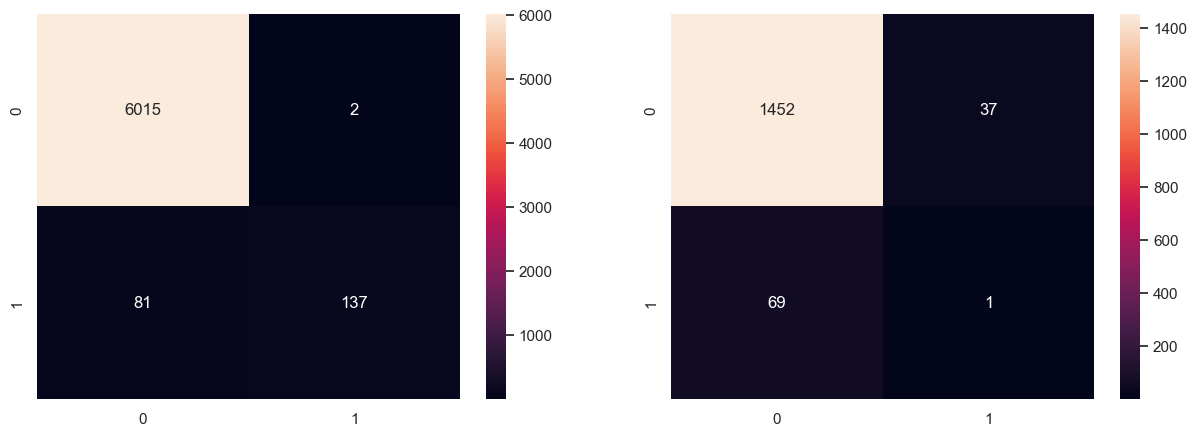

In [24]:
# Decision Tree for castSum
dectree2 = DecisionTreeClassifier(max_depth = 20)
dectree2.fit(castSum_train, won_train2)

# Predicting the Test set results
castSum_train_pred = dectree2.predict(castSum_train)
castSum_test_pred = dectree2.predict(castSum_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train2, castSum_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test2, castSum_test_pred), annot = True, fmt = "d", ax = ax[1])

[Text(0.43011413520632136, 0.9761904761904762, 'castSum <= 317.1\ngini = 0.067\nsamples = 6235\nvalue = [6017, 218]\nclass = Won'),
 Text(0.1760755048287972, 0.9285714285714286, 'castSum <= 111.817\ngini = 0.046\nsamples = 5222\nvalue = [5100, 122]\nclass = Won'),
 Text(0.056189640035118525, 0.8809523809523809, 'castSum <= 13.066\ngini = 0.016\nsamples = 1932\nvalue = [1916, 16]\nclass = Won'),
 Text(0.033713784021071114, 0.8333333333333334, 'castSum <= 13.056\ngini = 0.06\nsamples = 65\nvalue = [63, 2]\nclass = Won'),
 Text(0.028094820017559263, 0.7857142857142857, 'castSum <= 9.827\ngini = 0.031\nsamples = 64\nvalue = [63, 1]\nclass = Won'),
 Text(0.02247585601404741, 0.7380952380952381, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]\nclass = Won'),
 Text(0.033713784021071114, 0.7380952380952381, 'castSum <= 10.016\ngini = 0.074\nsamples = 26\nvalue = [25, 1]\nclass = Won'),
 Text(0.028094820017559263, 0.6904761904761905, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Not Won'),
 Text

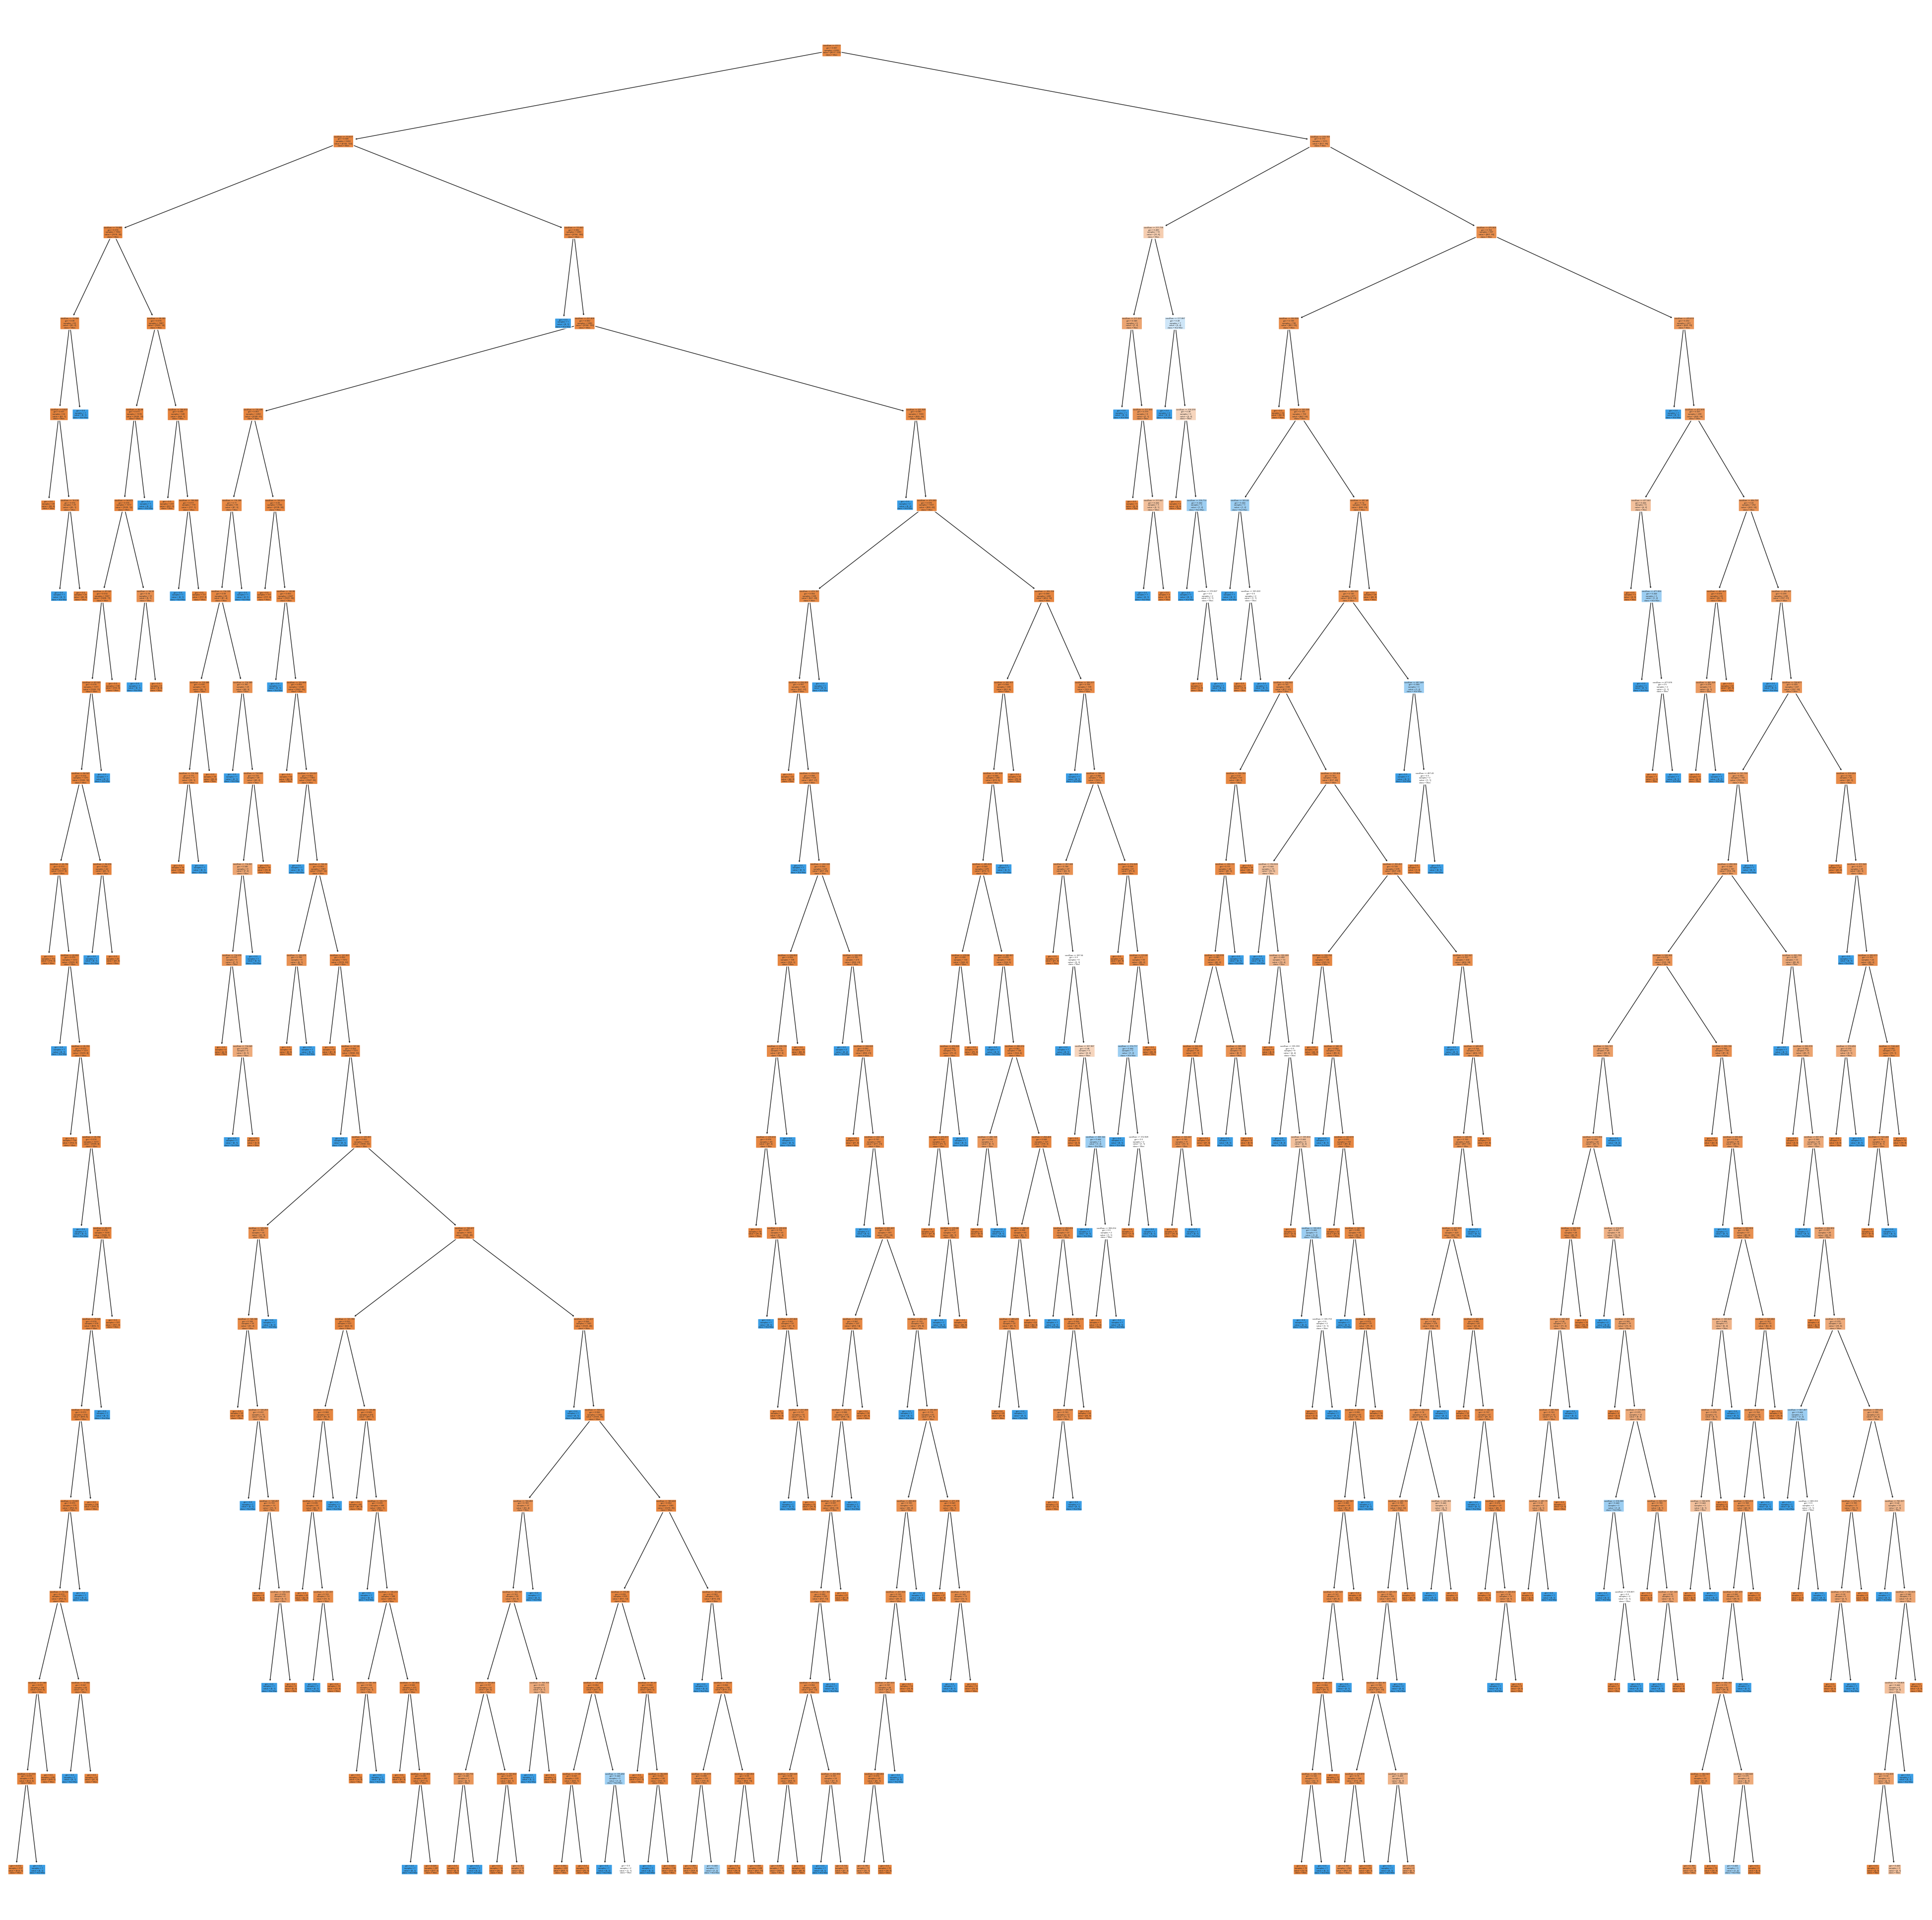

In [11]:
# Printing decision Tree
f = plt.figure(figsize=(50,50))
plot_tree(dectree2, filled = True, rounded = True, class_names = ["Won", "Not Won"], feature_names = ["castSum"])

## CrewSum

<AxesSubplot:>

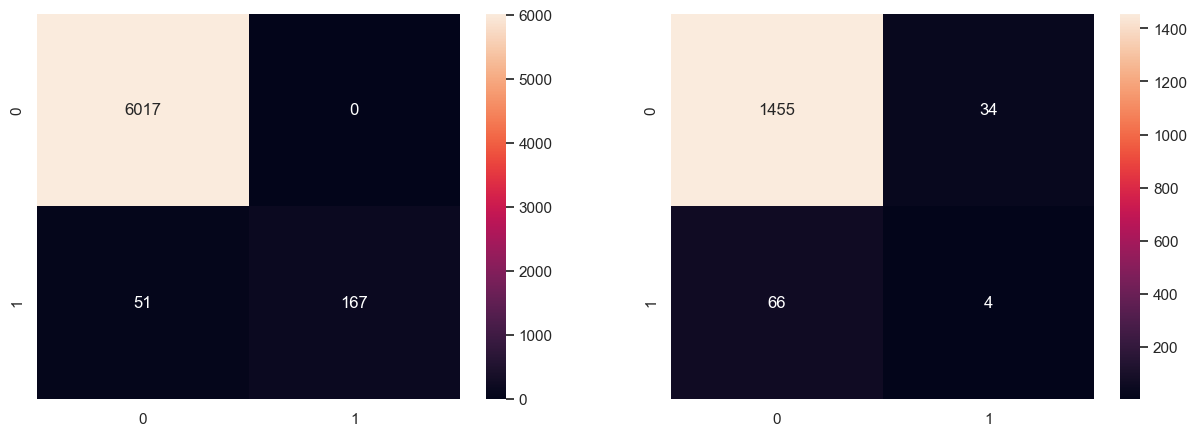

In [25]:
# Decision Tree for crewSum
dectree3 = DecisionTreeClassifier(max_depth = 20)
dectree3.fit(crewSum_train, won_train3)

# Predicting the Test set results
crewSum_train_pred = dectree3.predict(crewSum_train)
crewSum_test_pred = dectree3.predict(crewSum_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train3, crewSum_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test3, crewSum_test_pred), annot = True, fmt = "d", ax = ax[1])

[Text(0.4818244112073633, 0.9761904761904762, 'crewSum <= 142.708\ngini = 0.067\nsamples = 6235\nvalue = [6017, 218]\nclass = Won'),
 Text(0.18013163237682728, 0.9285714285714286, 'crewSum <= 65.881\ngini = 0.042\nsamples = 5120\nvalue = [5011, 109]\nclass = Won'),
 Text(0.0994856524093124, 0.8809523809523809, 'crewSum <= 41.405\ngini = 0.023\nsamples = 3389\nvalue = [3349, 40]\nclass = Won'),
 Text(0.047644829453167295, 0.8333333333333334, 'crewSum <= 13.242\ngini = 0.016\nsamples = 2287\nvalue = [2269, 18]\nclass = Won'),
 Text(0.04331348132106118, 0.7857142857142857, 'gini = 0.0\nsamples = 501\nvalue = [501, 0]\nclass = Won'),
 Text(0.05197617758527342, 0.7857142857142857, 'crewSum <= 13.264\ngini = 0.02\nsamples = 1786\nvalue = [1768, 18]\nclass = Won'),
 Text(0.047644829453167295, 0.7380952380952381, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Not Won'),
 Text(0.056307525717379535, 0.7380952380952381, 'crewSum <= 13.701\ngini = 0.019\nsamples = 1785\nvalue = [1768, 17]\nclas

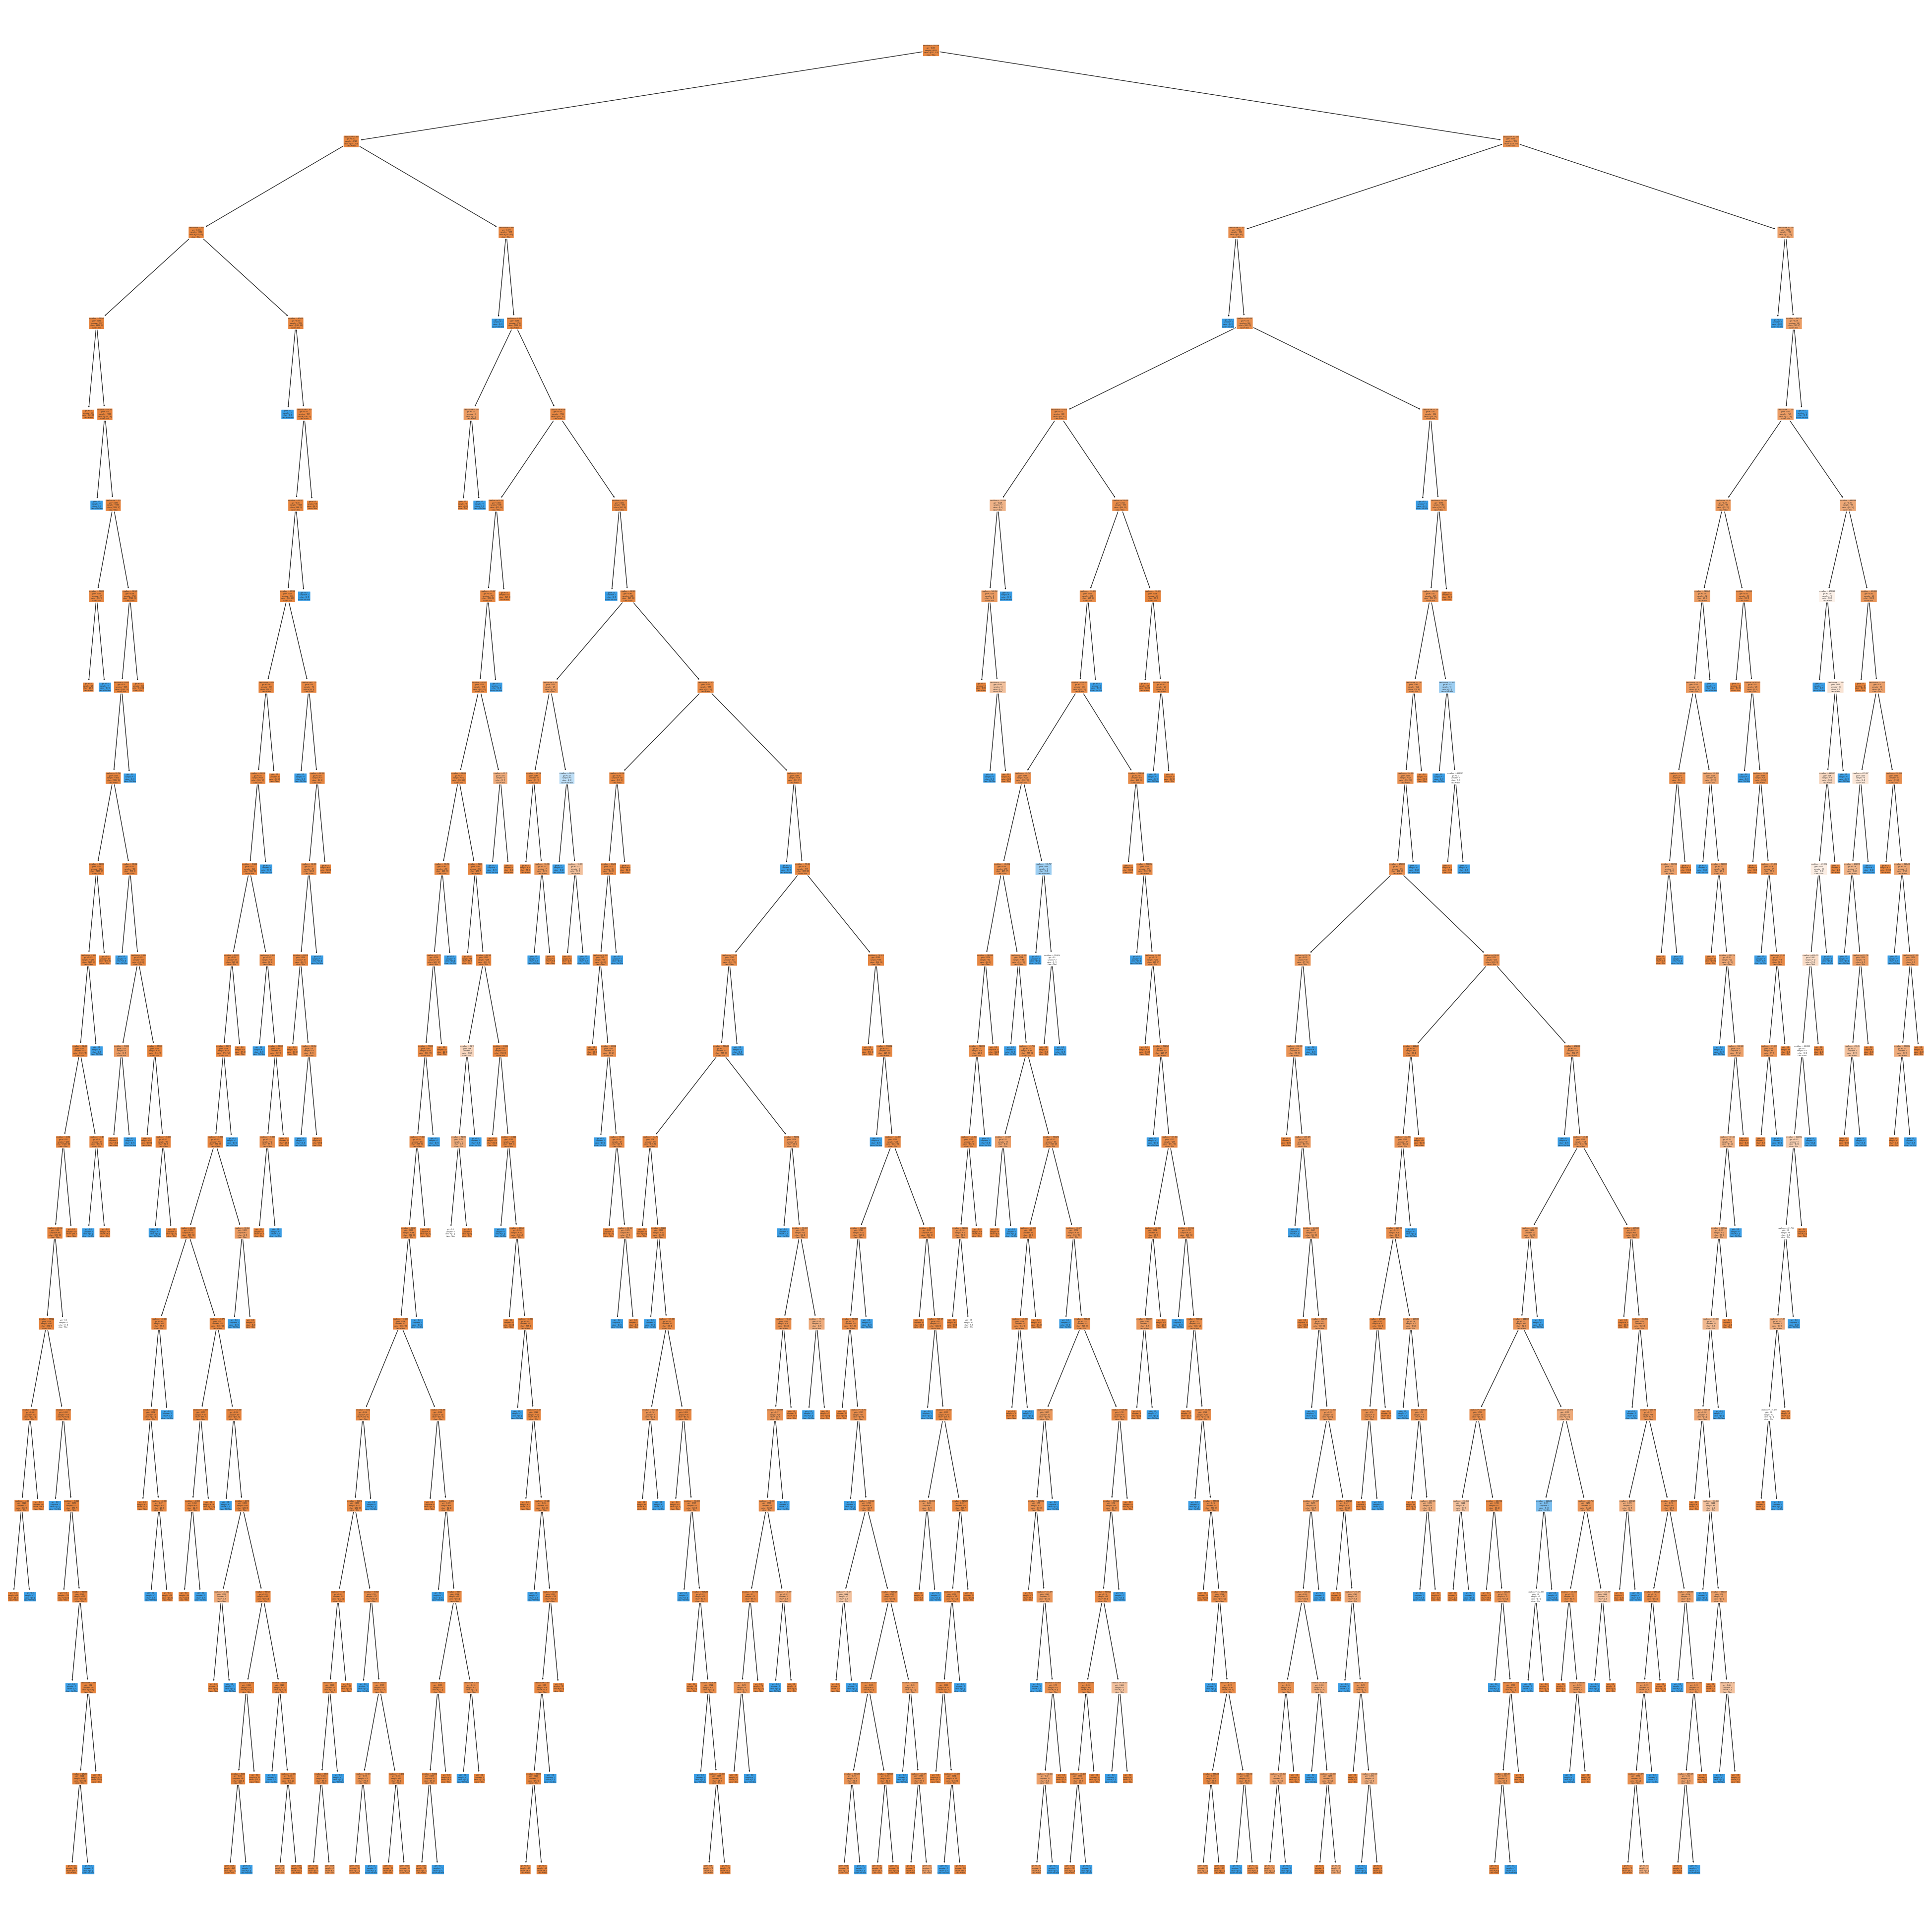

In [13]:
# Printing decision Tree
f = plt.figure(figsize=(50,50))
plot_tree(dectree3, filled = True, rounded = True, class_names = ["Won", "Not Won"], feature_names = ["crewSum"])

## VoteAvg

<AxesSubplot:>

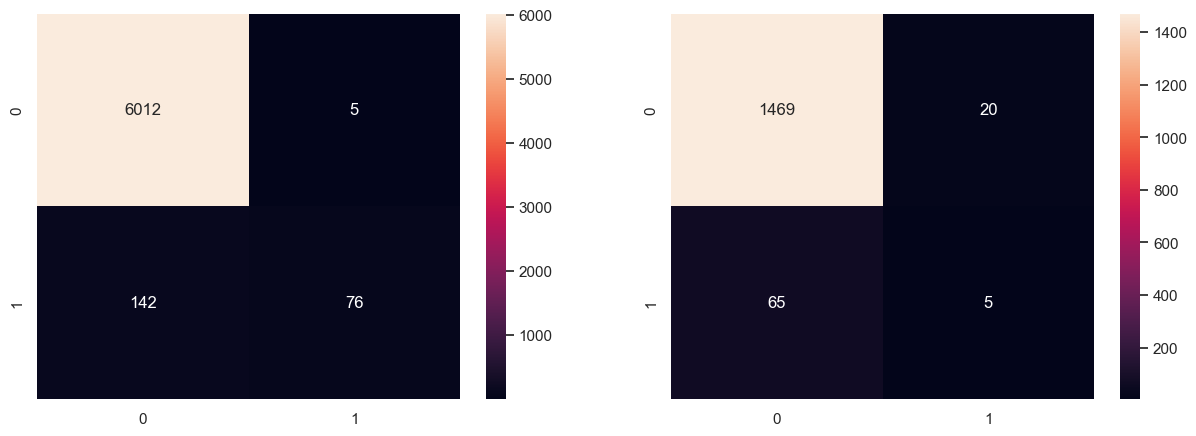

In [26]:
# Decision Tree for voteAvg
dectree4 = DecisionTreeClassifier(max_depth = 20)
dectree4.fit(voteAvg_train, won_train4)

# Predicting the Test set results
voteAvg_train_pred = dectree4.predict(voteAvg_train)
voteAvg_test_pred = dectree4.predict(voteAvg_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train4, voteAvg_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test4, voteAvg_test_pred), annot = True, fmt = "d", ax = ax[1])

In [15]:
# Printing decision Tree
f = plt.figure(figsize=(50,50))
plot_tree(dectree4, filled = True, rounded = True, class_names = ["Won", "Not Won"], feature_names = ["voteAvg"])

[Text(0.5106020332776564, 0.9761904761904762, 'voteAvg <= 7.336\ngini = 0.067\nsamples = 6235\nvalue = [6017, 218]\nclass = Won'),
 Text(0.20774444301683156, 0.9285714285714286, 'voteAvg <= 6.736\ngini = 0.033\nsamples = 5375\nvalue = [5285, 90]\nclass = Won'),
 Text(0.04313889245792111, 0.8809523809523809, 'voteAvg <= 5.837\ngini = 0.011\nsamples = 3958\nvalue = [3937, 21]\nclass = Won'),
 Text(0.016446100475395093, 0.8333333333333334, 'voteAvg <= 4.403\ngini = 0.003\nsamples = 1454\nvalue = [1452, 2]\nclass = Won'),
 Text(0.008223050237697547, 0.7857142857142857, 'voteAvg <= 4.391\ngini = 0.016\nsamples = 123\nvalue = [122, 1]\nclass = Won'),
 Text(0.004111525118848773, 0.7380952380952381, 'gini = 0.0\nsamples = 113\nvalue = [113, 0]\nclass = Won'),
 Text(0.012334575356546319, 0.7380952380952381, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = Won'),
 Text(0.024669150713092638, 0.7857142857142857, 'voteAvg <= 5.625\ngini = 0.002\nsamples = 1331\nvalue = [1330, 1]\nclass = Won'),


Error in callback <function flush_figures at 0x7fcd9806b0d0> (for post_execute):


KeyboardInterrupt: 

# This did not go that well

Trying multiple x-variables for a model

In [27]:
multiVar = pd.DataFrame(movieDB[['runtime', 'casts_popularity_sum', 'crews_popularity_sum', 'vote_average']])
multiVar2 = pd.DataFrame(movieDB[['runtime', 'casts_popularity_sum', 'crews_popularity_sum', 'vote_average', 'percentage_revenue']])

In [28]:
# Splitting the dataset into the Training set and Test set

won_train5, won_test5, multiVar_train, multiVar_test = train_test_split(won, multiVar, test_size = 0.2, random_state=50)
print("Multi Var Set")
print("Train Set :", won_train5.shape, multiVar_train.shape)
print("Test Set  :", won_test5.shape, multiVar_test.shape)

# Splitting the dataset into the Training set and Test set
won_train7, won_test7, multiVar2_train, multiVar2_test = train_test_split(won, multiVar2, test_size = 0.2, random_state=50)
print("Multi Var Set 2")
print("Train Set :", won_train7.shape, multiVar2_train.shape)
print("Test Set  :", won_test7.shape, multiVar2_test.shape)

Multi Var Set
Train Set : (6235, 1) (6235, 4)
Test Set  : (1559, 1) (1559, 4)
Multi Var Set 2
Train Set : (6235, 1) (6235, 5)
Test Set  : (1559, 1) (1559, 5)


<AxesSubplot:>

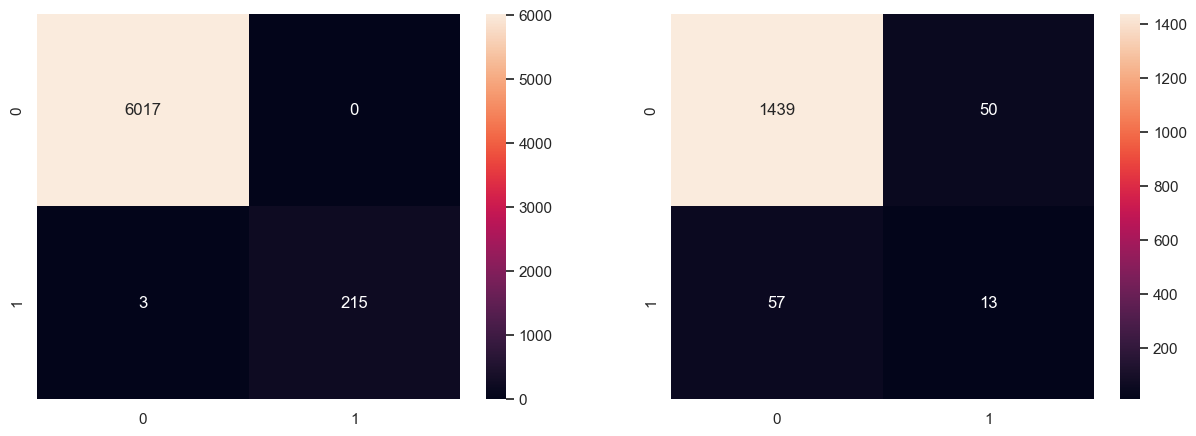

In [29]:
# Decision Tree for multiVar
dectree5 = DecisionTreeClassifier(max_depth = 20, random_state=50)
dectree5.fit(multiVar_train, won_train5)

# Predicting the Test set results
multiVar_train_pred = dectree5.predict(multiVar_train)
multiVar_test_pred = dectree5.predict(multiVar_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train5, multiVar_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test5, multiVar_test_pred), annot = True, fmt = "d", ax = ax[1])

### Does not look really good on the test set.

[Text(0.47852432676415635, 0.9761904761904762, 'vote_average <= 7.156\ngini = 0.12\nsamples = 7689\nvalue = [7195, 494]\nclass = Won'),
 Text(0.21921540403133083, 0.9285714285714286, 'runtime <= 110.5\ngini = 0.057\nsamples = 5984\nvalue = [5809, 175]\nclass = Won'),
 Text(0.08698283450704225, 0.8809523809523809, 'vote_average <= 6.474\ngini = 0.026\nsamples = 4272\nvalue = [4215, 57]\nclass = Won'),
 Text(0.05102040816326531, 0.8333333333333334, 'vote_average <= 6.111\ngini = 0.013\nsamples = 2990\nvalue = [2971, 19]\nclass = Won'),
 Text(0.03636102328255246, 0.7857142857142857, 'casts_popularity_sum <= 446.765\ngini = 0.006\nsamples = 2119\nvalue = [2113, 6]\nclass = Won'),
 Text(0.029031330842196033, 0.7380952380952381, 'runtime <= 109.5\ngini = 0.005\nsamples = 2094\nvalue = [2089, 5]\nclass = Won'),
 Text(0.021270480022995114, 0.6904761904761905, 'runtime <= 93.5\ngini = 0.004\nsamples = 2039\nvalue = [2035, 4]\nclass = Won'),
 Text(0.018970968669157803, 0.6428571428571429, 'gini 

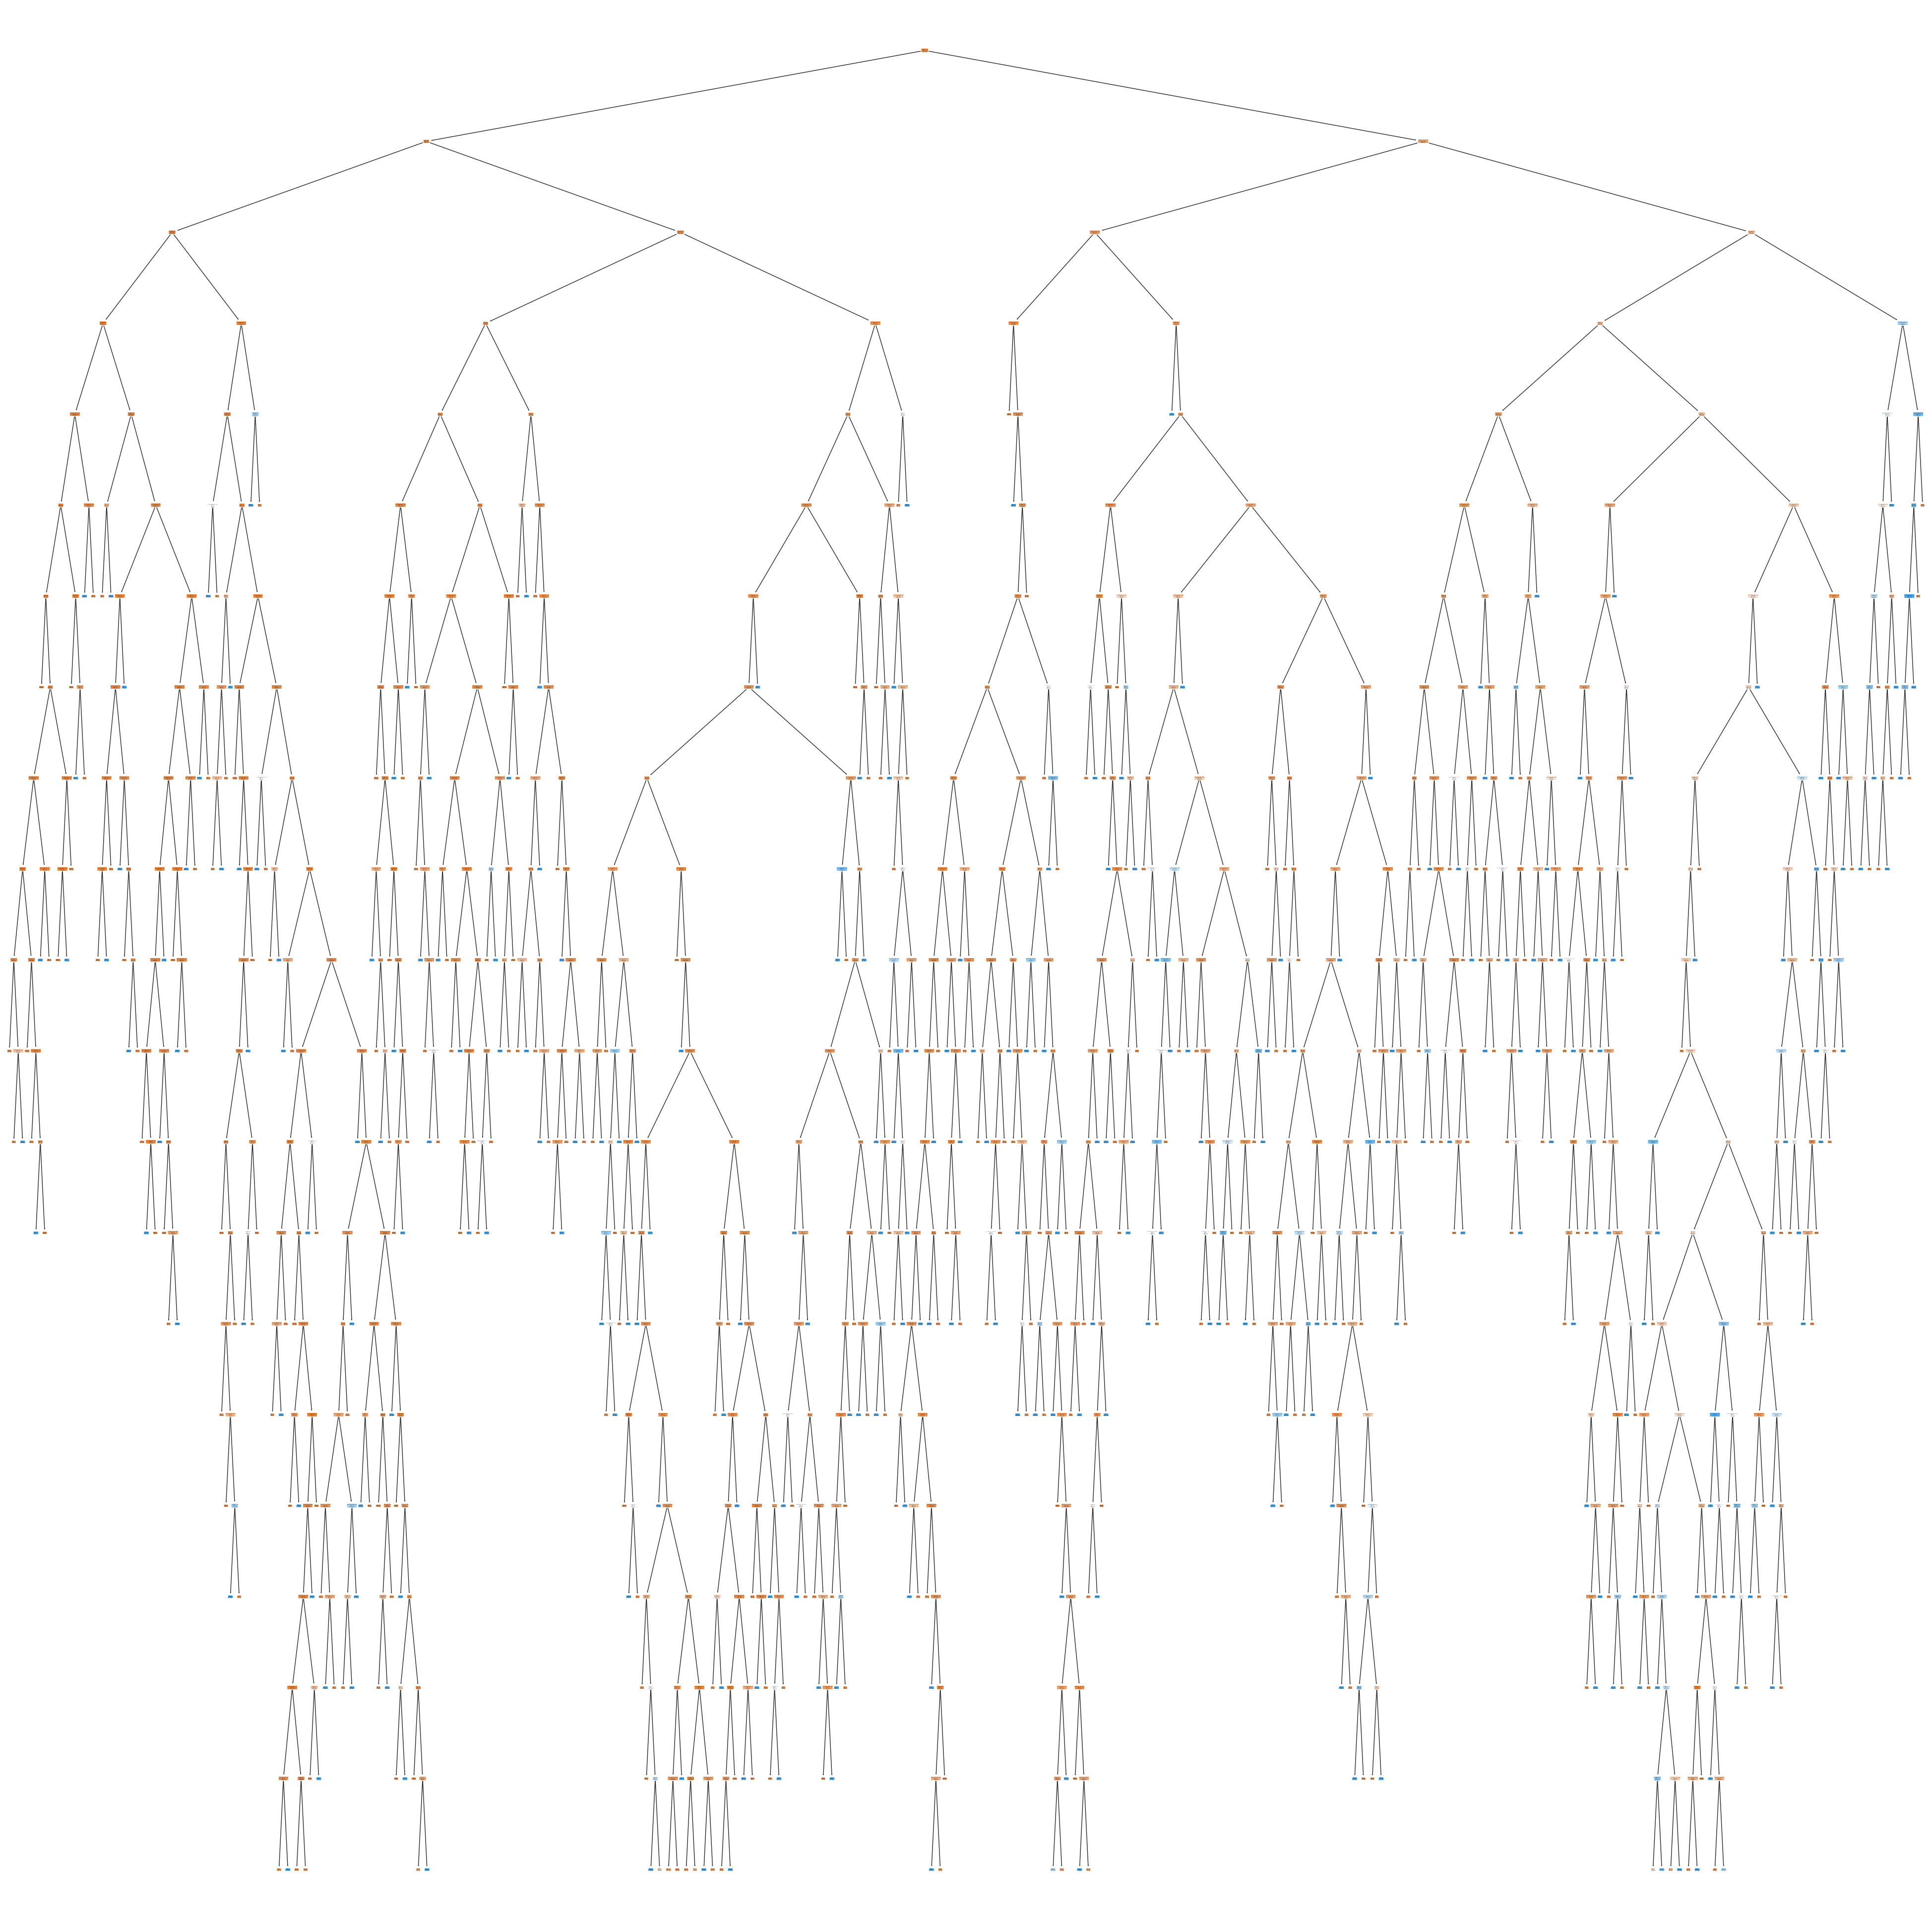

In [ ]:
# Printing decision Tree
f = plt.figure(figsize=(50,50))
plot_tree(dectree5, filled = True, rounded = True, class_names = ["Won", "Not Won"], feature_names = ["runtime", "casts_popularity_sum", "crews_popularity_sum", "vote_average"])

<AxesSubplot:>

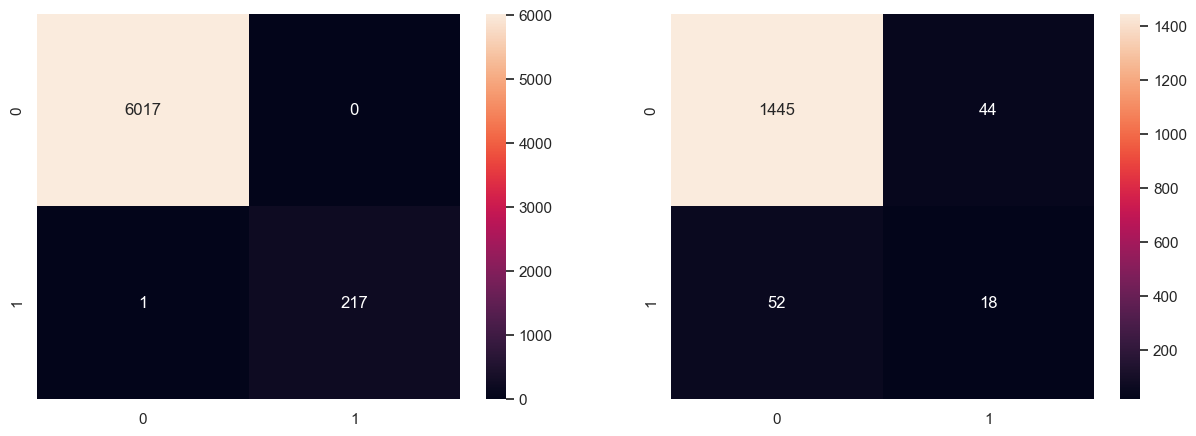

In [30]:
# Decision Tree for multiVar2
dectree6 = DecisionTreeClassifier(max_depth = 20, random_state=50)
dectree6.fit(multiVar2_train, won_train7)

# Predicting the Test set results
multiVar2_train_pred = dectree6.predict(multiVar2_train)
multiVar2_test_pred = dectree6.predict(multiVar2_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train7, multiVar2_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test7, multiVar2_test_pred), annot = True, fmt = "d", ax = ax[1])

/var/folders/pv/4s9_lh1909z14tnpgcdzkk3m0000gn/T/ipykernel_48968/1913432871.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(runtime_train, won_train)


<AxesSubplot:>

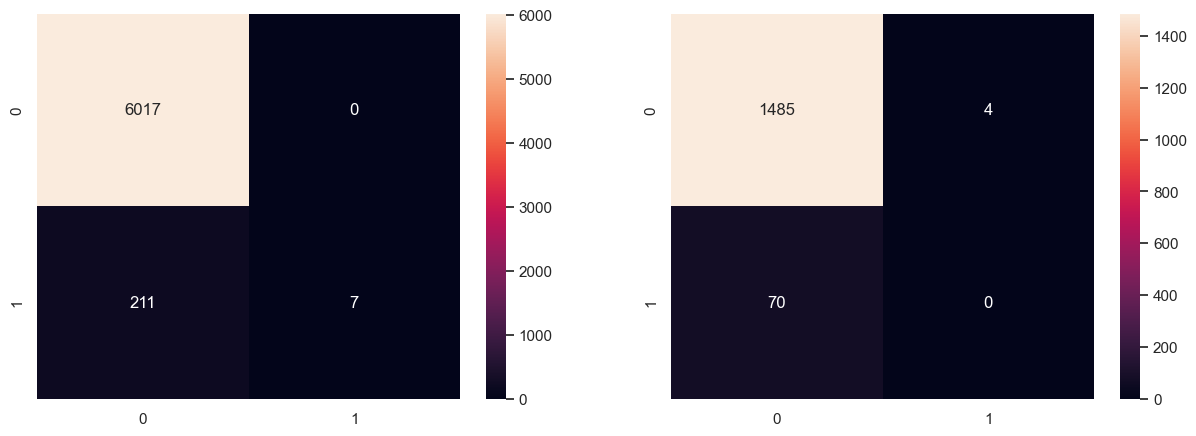

In [31]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Fitting Random Forest Classification to the Training set

# Based on runtime
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfc.fit(runtime_train, won_train)

# Predicting the Test set results
runtime_rfc_train_pred = rfc.predict(runtime_train)
runtime_rfc_test_pred = rfc.predict(runtime_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train, runtime_rfc_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test, runtime_rfc_test_pred), annot = True, fmt = "d", ax = ax[1])


/var/folders/pv/4s9_lh1909z14tnpgcdzkk3m0000gn/T/ipykernel_48968/3630255184.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc2.fit(castSum_train, won_train2)


<AxesSubplot:>

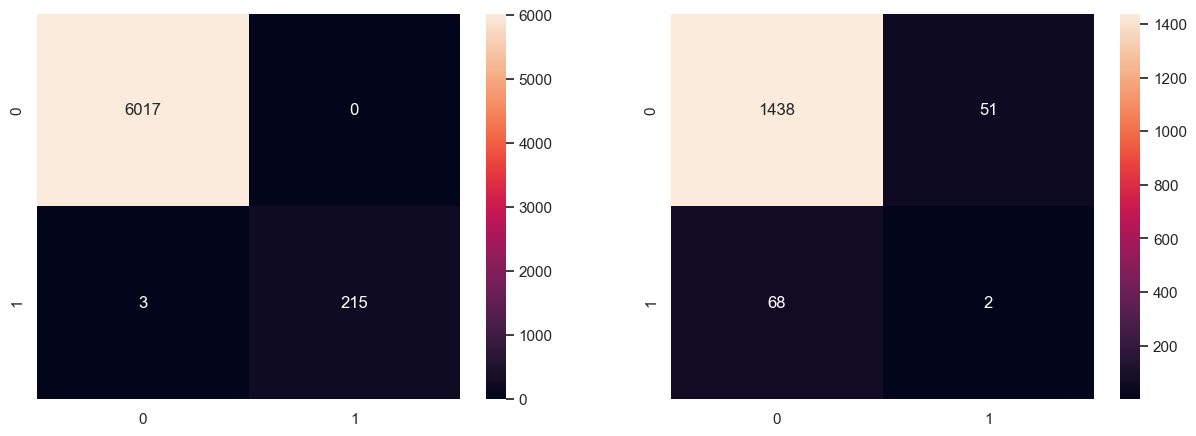

In [32]:
# Based on castSum
rfc2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfc2.fit(castSum_train, won_train2)

# Predicting the Test set results
castSum_rfc_train_pred = rfc2.predict(castSum_train)
castSum_rfc_test_pred = rfc2.predict(castSum_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train2, castSum_rfc_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test2, castSum_rfc_test_pred), annot = True, fmt = "d", ax = ax[1])

/var/folders/pv/4s9_lh1909z14tnpgcdzkk3m0000gn/T/ipykernel_48968/2230048467.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc3.fit(crewSum_train, won_train3)


<AxesSubplot:>

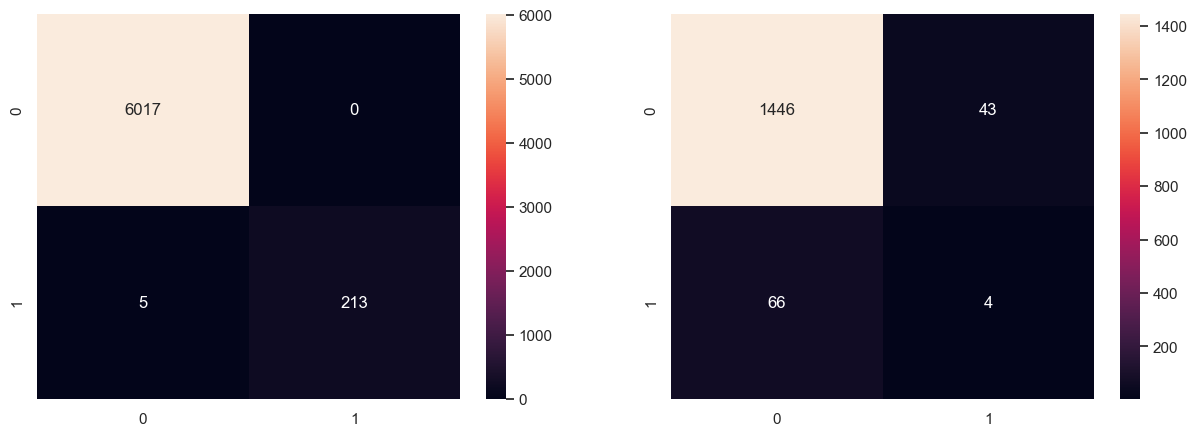

In [33]:
# Based on crewSum
rfc3 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfc3.fit(crewSum_train, won_train3)

# Predicting the Test set results
crewSum_rfc_train_pred = rfc3.predict(crewSum_train)
crewSum_rfc_test_pred = rfc3.predict(crewSum_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train3, crewSum_rfc_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test3, crewSum_rfc_test_pred), annot = True, fmt = "d", ax = ax[1])

/var/folders/pv/4s9_lh1909z14tnpgcdzkk3m0000gn/T/ipykernel_48968/2675908940.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc4.fit(voteAvg_train, won_train4)


<AxesSubplot:>

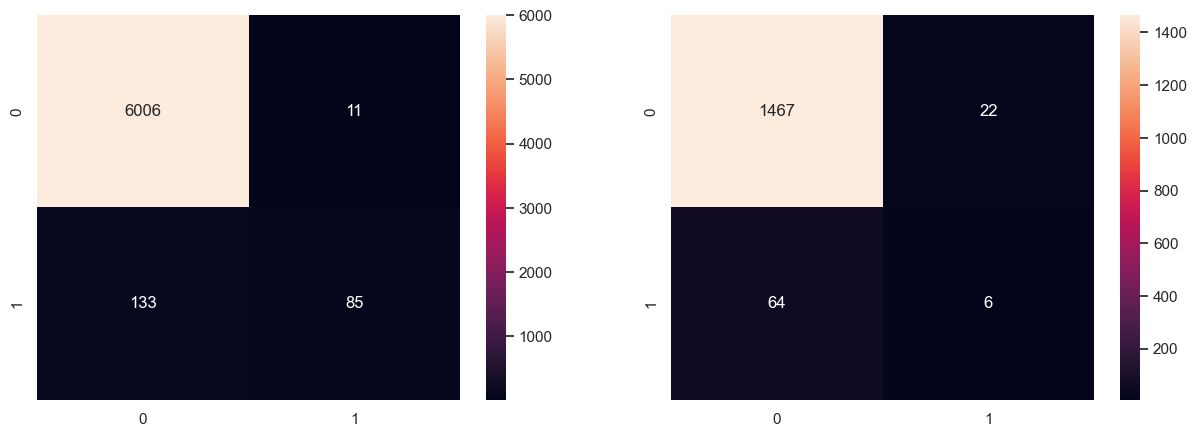

In [34]:
# Based on voteAvg
rfc4 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfc4.fit(voteAvg_train, won_train4)

# Predicting the Test set results
voteAvg_rfc_train_pred = rfc4.predict(voteAvg_train)
voteAvg_rfc_test_pred = rfc4.predict(voteAvg_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train4, voteAvg_rfc_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test4, voteAvg_rfc_test_pred), annot = True, fmt = "d", ax = ax[1])

/var/folders/pv/4s9_lh1909z14tnpgcdzkk3m0000gn/T/ipykernel_48968/1119631396.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc5.fit(multiVar_train, won_train5)


<AxesSubplot:>

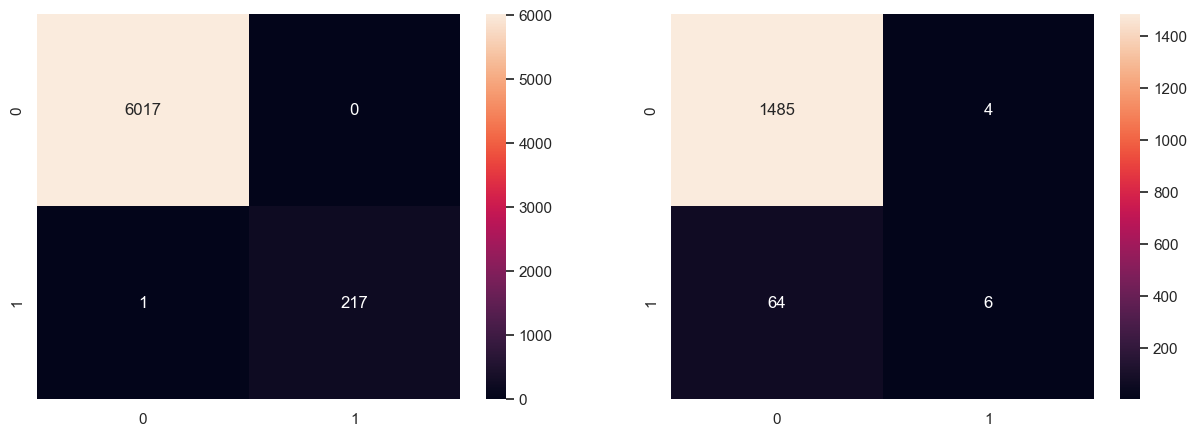

In [35]:
# Based on multiVar
rfc5 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfc5.fit(multiVar_train, won_train5)

# Predicting the Test set results
multiVar_rfc_train_pred = rfc5.predict(multiVar_train)
multiVar_rfc_test_pred = rfc5.predict(multiVar_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train5, multiVar_rfc_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test5, multiVar_rfc_test_pred), annot = True, fmt = "d", ax = ax[1])

# Okay randomForest wasn't much better

/Users/louisliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/louisliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/louisliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew

<AxesSubplot:>

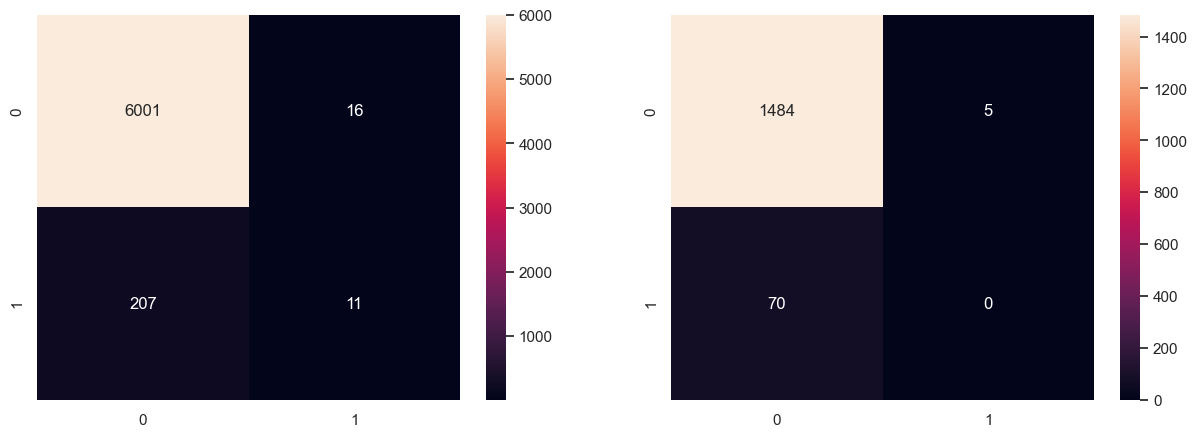

In [36]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Fitting K-NN to the Training set

# Based on runtime
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(runtime_train, won_train)

# Predicting the Test set results
runtime_knn_train_pred = knn.predict(runtime_train)
runtime_knn_test_pred = knn.predict(runtime_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train, runtime_knn_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test, runtime_knn_test_pred), annot = True, fmt = "d", ax = ax[1])

/Users/louisliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/louisliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/louisliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew

<AxesSubplot:>

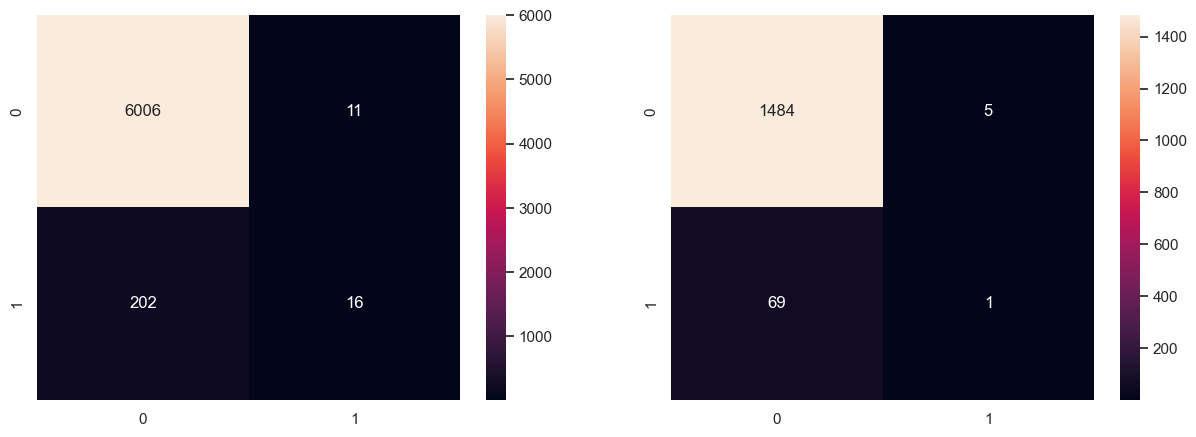

In [37]:
# Based on castSum
knn2 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn2.fit(castSum_train, won_train2)

# Predicting the Test set results
castSum_knn_train_pred = knn2.predict(castSum_train)
castSum_knn_test_pred = knn2.predict(castSum_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train2, castSum_knn_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test2, castSum_knn_test_pred), annot = True, fmt = "d", ax = ax[1])

/Users/louisliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/louisliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/louisliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew

<AxesSubplot:>

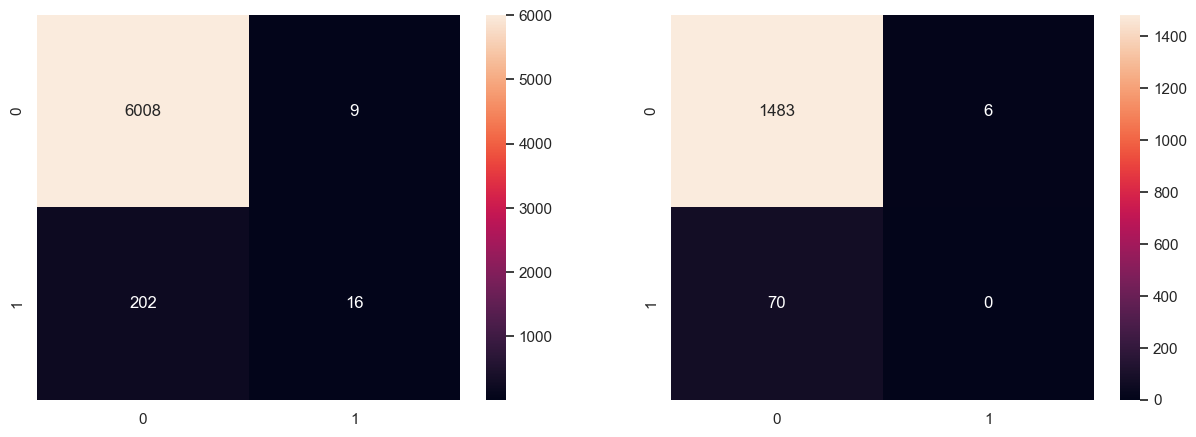

In [38]:
# Based on crewSum
knn3 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn3.fit(crewSum_train, won_train3)

# Predicting the Test set results
crewSum_knn_train_pred = knn3.predict(crewSum_train)
crewSum_knn_test_pred = knn3.predict(crewSum_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train3, crewSum_knn_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test3, crewSum_knn_test_pred), annot = True, fmt = "d", ax = ax[1])

/Users/louisliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/louisliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/louisliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew

<AxesSubplot:>

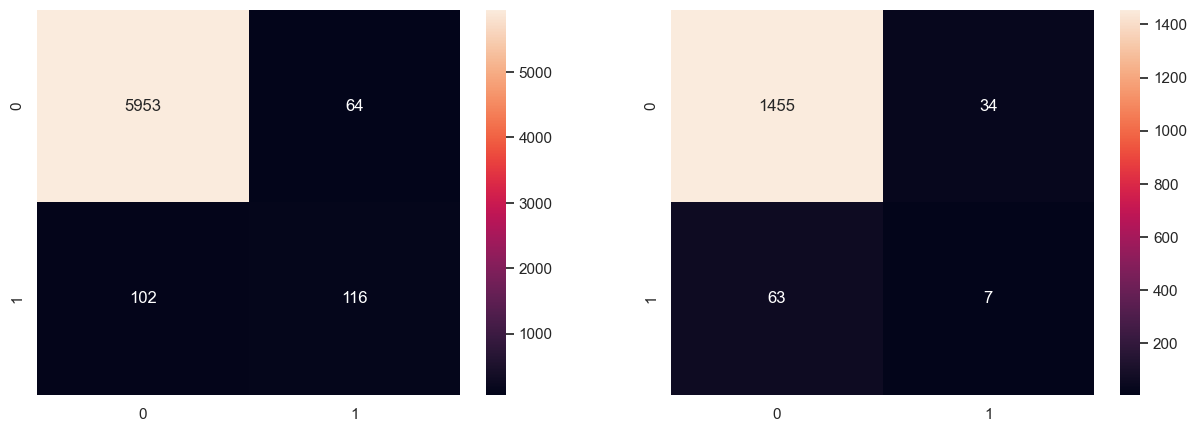

In [39]:
# Based on voteAvg
knn4 = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn4.fit(voteAvg_train, won_train4)

# Predicting the Test set results
voteAvg_knn_train_pred = knn4.predict(voteAvg_train)
voteAvg_knn_test_pred = knn4.predict(voteAvg_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train4, voteAvg_knn_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test4, voteAvg_knn_test_pred), annot = True, fmt = "d", ax = ax[1])

/Users/louisliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/louisliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/louisliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew

<AxesSubplot:>

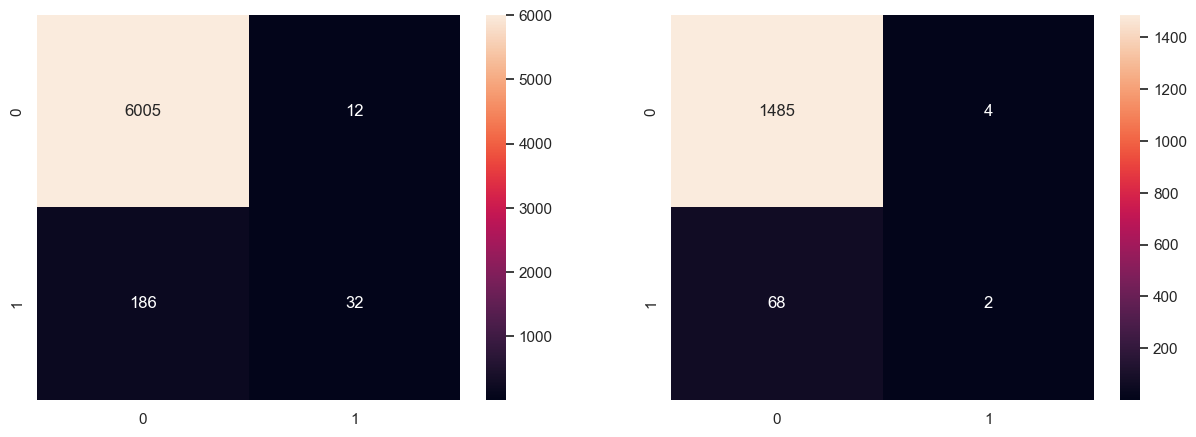

In [40]:
# Based on multiVar
knn5 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 5)
knn5.fit(multiVar_train, won_train5)

# Predicting the Test set results
multiVar_knn_train_pred = knn5.predict(multiVar_train)
multiVar_knn_test_pred = knn5.predict(multiVar_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train5, multiVar_knn_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test5, multiVar_knn_test_pred), annot = True, fmt = "d", ax = ax[1])

# KNN did not work very well either

/Users/louisliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

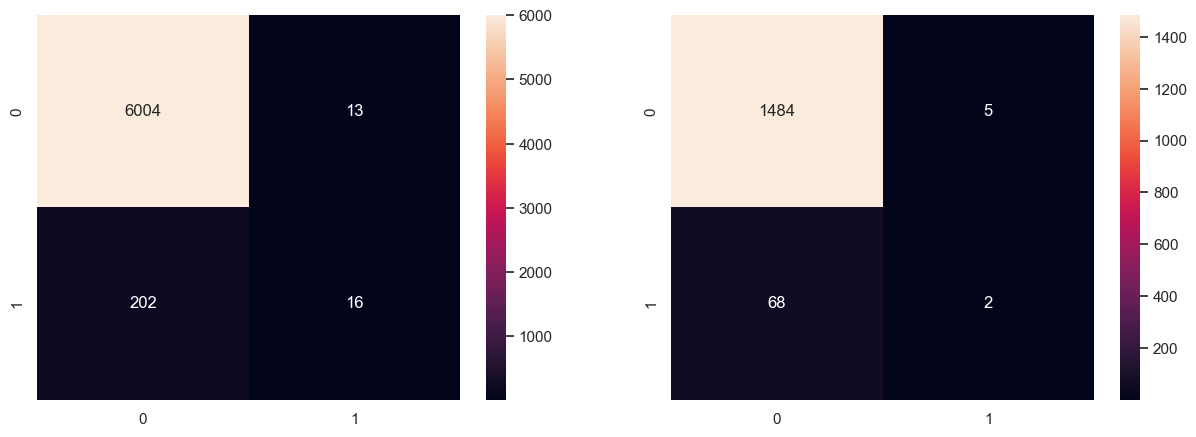

In [41]:
# Trying Logistic Regression
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression to the Training set

# Based on mutliVar
lr = LogisticRegression(random_state = 0)
lr.fit(multiVar_train, won_train5)

# Predicting the Test set results
multiVar_lr_train_pred = lr.predict(multiVar_train)
multiVar_lr_test_pred = lr.predict(multiVar_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train5, multiVar_lr_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test5, multiVar_lr_test_pred), annot = True, fmt = "d", ax = ax[1])

In [ ]:
# Trying SVM
from sklearn.svm import SVC

# Fitting SVM to the Training set

# Based on mutliVar
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(multiVar_train, won_train5)

# Predicting the Test set results
multiVar_svc_train_pred = svc.predict(multiVar_train)
multiVar_svc_test_pred = svc.predict(multiVar_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train5, multiVar_svc_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test5, multiVar_svc_test_pred), annot = True, fmt = "d", ax = ax[1])

/Users/louisliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Ran on google collab it was useless

/Users/louisliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

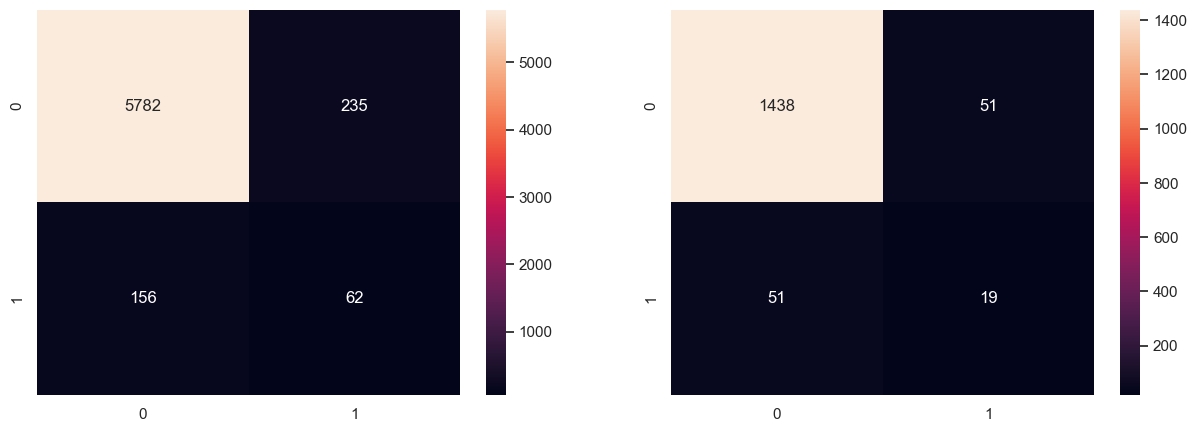

In [42]:
# Trying Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Fitting Naive Bayes to the Training set

# Based on mutliVar
nb = GaussianNB()
nb.fit(multiVar_train, won_train5)

# Predicting the Test set results
multiVar_nb_train_pred = nb.predict(multiVar_train)
multiVar_nb_test_pred = nb.predict(multiVar_test)

# Confusion Matrix for Train and Test Set
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.heatmap(confusion_matrix(won_train5, multiVar_nb_train_pred), annot = True, fmt = "d", ax = ax[0])
sb.heatmap(confusion_matrix(won_test5, multiVar_nb_test_pred), annot = True, fmt = "d", ax = ax[1])

I think it is time for us to focus on a smaller scope. Possibly use the latest 30 years of movies and oscars